In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
#from mpmath import *
#!jt -t -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.90
Lambda=0.0#0.0001#0.1#0.14#0.1#0.1
scalarfield=True
A=.001#.115
vscalarfield=False


In [3]:
Tol=.25#.025#.05
N=100
Nul=100
Nup=10**(60)
scal=20
uscal=10
umax=100
vmax=60
extraterms=True
rcosmtol=.0001#.0000000000000001

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=2.0
#dr0v=0.045
dr0v=0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)#0.05#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)
#dr0v=.075

vbdytype="edd"
ubdytype="stan"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]

#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)

0.10125


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)
#print("Number of points for lowest iteration is "+str(Nu*Nv)+","+str(Nu)+"X"+str(Nv))
print("Number of points for highest iteration is "+str(Nu*Nv*max(Elist)**2)+","+str(Nu*max(Elist))+"X"+str(Nv*max(Elist)))

numpoints=Nu*Nv

print("Total number of points is "+str(int(numpoints)))

predtime=numpoints/(1700000)

print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")


r+: 1.4358898943540672
r-: 0.5641101056459328
rc: 0.0
Max r along u=0: 8.075
Number of points for highest iteration is 60000000,10000X6000
Total number of points is 60000000
Runtime: about 0.59 minutes


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

0.0


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,ubdytype,vbdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
#print(mask)
rnpf=rnpf[:,mask]
#print(rnpf)
Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)

#print(massnpf)

6000
[ 2.          2.00101325  2.00202801 ... 24.25583175 24.26042619
 24.26502069] 6000


In [7]:
#print(rnpf)
print(len(rnpf[0]))
print(Nv)
#print(signpf)

6000
6000


6000 6000 60.0
6000


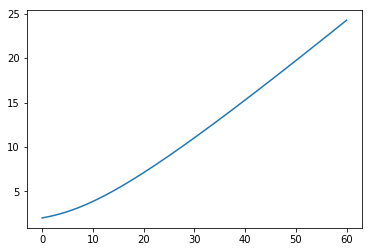

1.0000125266192037 inf
-0.10124999999999999
[[0.10125    0.10140067 0.10155147 ... 0.45943945 0.459447   0.45945454]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
vmax=(Nv)*dv0

print(Nv,len(rnpf[0]),vmax)

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]
print(len(vrange))
#print(vrange)
        
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)
print(drnpuf[0,0])

print(drnpvf)

In [9]:
drunptemp=np.empty((Nv))*np.nan
#dsigunp=np.empty((Nu))*np.nan


A=.115
u1=9.5
u2=10

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)

massnpf[0][0]=1.0

#drunp[0]=-mth.exp(signpf[0][0])/(4.0*dr0v)*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda*ru0**2/3)
#dsigunpvalue=100*np.exp(np.nanmax(signpf))
#drunptemp=drunp[0]
    

i=0
icount=0
dv=dv0
if M0>0:
    du0=M0/Nul
elif M0==0:
    du0=1/Nul

du=du0

###fix this part (put in front of boundary conditions so it is an initial condition)
#if bdytype=="edd" or bdytype=="fulledd":
    #bdyvalue=1.0
    #dsignpuf[0]=2*(3*Q**2-3*M0*ru0+ru0**4*Lambda)/(ru0*(-3*Q**2+ru0*(6*M0-3*ru0+ru0**3*Lambda)))*drunp[0]
    #dsigunp[0]=2.0*(M0*rnpf[0]-Q**2.0)/(rnpf[0]*(Q**2.0+rnpf[0]*(-2*M0+rnpf[0])))*drunp[0]
#else:
    #bdyvalue=0.0
    #dsigunp[0]=0.0
######
    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnp.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))

signpfile = tables.open_file('signp.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinp.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnp.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))

if extraterms==True:
    drnpufile = tables.open_file('drnpu.h5', mode='w',encoding="utf8") 
    drnpu = drnpufile.create_earray(drnpufile.root, 'data', atom, (0, Nv))
    drnpvfile = tables.open_file('drnpv.h5', mode='w',encoding="utf8") 
    drnpv = drnpvfile.create_earray(drnpvfile.root, 'data', atom, (0, Nv))
    dsignpufile = tables.open_file('dsignpu.h5', mode='w',encoding="utf8") 
    dsignpu = dsignpufile.create_earray(dsignpufile.root, 'data', atom, (0, Nv))
    dsignpvfile = tables.open_file('dsignpv.h5', mode='w',encoding="utf8") 
    dsignpv = dsignpvfile.create_earray(dsignpvfile.root, 'data', atom, (0, Nv))
    dphinpufile = tables.open_file('dphinpu.h5', mode='w',encoding="utf8") 
    dphinpu = dphinpufile.create_earray(dphinpufile.root, 'data', atom, (0, Nv))
    dphinpvfile = tables.open_file('dphinpv.h5', mode='w',encoding="utf8") 
    dphinpv = dphinpvfile.create_earray(dphinpvfile.root, 'data', atom, (0, Nv))
    
    
 
#rtemp=rnpf[0]   
#print(rtemp)
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

#drunp=np.append(drunp,np.nan)
#dsigunp=np.append(dsigunp,np.nan)
#dphinpuf=np.append(dphinpuf,np.nan)
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))

rnpf[1][0]=rnpf[0][0]

i=0
TempTol=1 
TempTolv=1
Eres=False
if ubdytype=='adapt':
    maxsig1=signpf[0][0]-np.nanmax(signpf[0])
    maxsig2=signpf[0][0]-np.nanmax(signpf[0])
    maxsig3=signpf[0][0]-np.nanmax(signpf[0])
    print(maxsig1,maxsig2,maxsig3)
    

while max(urange)<umax and i<200000 and du>0.0: #and rnpf[1][0]>0.0 :

    
    du=du0*Tol*TempTol/np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])
    #du=du0*Tol*TempTol/max([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp)])

    
    #if du<1/Nup*1.1:
        #du=1/Nup
     
    du=np.min([du,1/(1*Nul)])
    #if du>=1/Nul:
        #print('r='+str(rnpf[i][0]))
        #if rnpf[1][0]<rplus:
            #du=1/(1*Nul)
            #print(rplus)
        #else:
            #du=1/Nul
    

    #print("%.24f" % urange[i])
    #print("%.24f" % du)
    
    ###fix this section (dphinpuf is in the wrong form)
    #if urange[i]>u1 and urange[i]<u2 and vscalarfield==True:
        #u=urange[i]+du
        #phinpf[1][0]=A*64*(u-u1)**3.0*(u2-u)**3.0/(u2-u1)**6.0
        #dphinpuf[i]=192*A*(u-u1)**2.0*(u-u2)**2.0*(-2*u+u1+u2)/(u1-u2)**6.0 
    #else:
        #continue
        #phinpf[1][0]=0.0
        #dphinpuf[i+1]=0.0
    

    ###Predictor###
    #drnpvf[1]=drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    
    dsignpvf[1]=dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1]=dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1]=drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+du*dsignpuf[0]
    phinpf[1]=phinpf[0]+du*dphinpuf[0]
    
    #drnpvf[1][0]=drnpvf[0][0]+du*odeu.Rfunc(drnpvf[0][0],drnpuf[0][0],rnpf[0][0],signpf[0][0],Q,Lambda)
    drnpvf[1][0]=-1/(4*drnpuf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    drnpvf[1]=drnpvf[1][0]*np.exp(signpf[1]-signpf[1][0])-np.exp(signpf[1])*(rnpf[1][0]*(dphinpvf[1][0])**2.0*np.exp(-signpf[1][0])+1/2*dv*(np.cumsum(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1])+np.roll(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),1))-(rnpf[1][0]*(dphinpvf[1][0])**2.0*np.exp(-signpf[1][0])+np.roll(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),1)[0])))
    
    #drnpuf[1]=drnpuf[1][0]+0.5*dv*(np.cumsum(np.roll(odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda),1)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))-(np.roll(odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda),1)[0]+odeu.Rfunc(drnpvf[1][0],drnpuf[1][0],rnpf[1][0],signpf[1][0],Q,Lambda)))
    #rnpf[1]=rnpf[1][0]+1/2*dv*(np.cumsum(drnpvf[1]+np.roll(drnpvf[1],1))-drnpvf[1][0]-np.roll(drnpvf[1],1)[0])
    
    #for j in range(0,Nv-1):
        #drnpvf[1][j+1]=drnpvf[1][j]+dv*odeu.Coneq(drnpvf[1][j],dsignpvf[1][j],dphinpvf[1][j],rnpf[1][j])
        #drnpvf[1][j+1]=drnpvf[1][j]+0.5*(dv*odeu.Coneq(drnpvf[1][j],dsignpvf[1][j],dphinpvf[1][j],rnpf[1][j])+dv*odeu.Coneq(drnpvf[1][j+1],dsignpvf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
    
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+dv*odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])         
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
            #dsignpuf[1][j+1]=dsignpuf[1][j]+dv*odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j], rnpf[1][j],signpf[1][j],Q)                                                                             
            #Phifuncnp=odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1])
    #else:
        #dphinpuf[1]=0.0
    
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0 
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    #if ubdytype=='stan':
        #dsignpuf[1][0]=0.0  
    if ubdytype=='adapt':
        nextsig=maxsig1*3.0-maxsig2*3.0+maxsig3*1.0
        dsignpuf[1][0]=(nextsig-signpf[0][0])/du#+dsignpuf[0][0])
        #print(nextsig,dsignpuf[1][0])
        #dsignpuf[1][0]=-(signpf[1][-1]-np.log(drnpvf[1][-1])+3/2*np.log(2))
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))
    
    #print(dsignpuf[1])
    #print(dphinpuf[1])
    
    ###Correction###
    #drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    
    #for j in range(0,Nv-1):
        #drnpvf[1][j+1]=drnpvf[1][j]+dv*odeu.Coneq(drnpvf[1][j],dsignpvf[1][j],dphinpvf[1][j],rnpf[1][j])
        #drnpvf[1][j+1]=drnpvf[1][j]+0.5*(dv*odeu.Coneq(drnpvf[1][j],dsignpvf[1][j],dphinpvf[1][j],rnpf[1][j])+dv*odeu.Coneq(drnpvf[1][j+1],dsignpvf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))
    dsignpvf[1]=dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1]=dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1]=drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    #drnpuf[1]=drnpuf[1][0]+0.5*dv*(np.cumsum(np.roll(odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda),1)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))-(np.roll(odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda),1)[0]+odeu.Rfunc(drnpvf[1][0],drnpuf[1][0],rnpf[1][0],signpf[1][0],Q,Lambda)))
    rnpf[1]=rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    signpf[1]=signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1]=phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    
    drnpvf[1]=drnpvf[1][0]*np.exp(signpf[1]-signpf[1][0])-np.exp(signpf[1])*(rnpf[1][0]*(dphinpvf[1][0])**2.0*np.exp(-signpf[1][0])+1/2*dv*(np.cumsum(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1])+np.roll(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),1))-(rnpf[1][0]*(dphinpvf[1][0])**2.0*np.exp(-signpf[1][0])+np.roll(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),1)[0])))
    #rnpf[1]=rnpf[1][0]+1/2*dv*(np.cumsum(drnpvf[1]+np.roll(drnpvf[1],1))-drnpvf[1][0]-np.roll(drnpvf[1],1)[0])
    
    #########
    #if np.any(phinpf[1]): 
        #dsignpuf[1][0]=0.0
        #dphinpuf[1][0]=0.0
        #for j in range(0,Nv-1):
            #dphinpuf[1][j+1]=dphinpuf[1][j]+1/2*dv*(odeu.Phifunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j])+odeu.Phifunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1]))         
            #dsignpuf[1][j+1]=dsignpuf[1][j]+1/2*dv*(odeu.Sigfunc(drnpvf[1][j],drnpuf[1][j],dphinpuf[1][j],dphinpvf[1][j],rnpf[1][j],signpf[1][j],Q)+odeu.Sigfunc(drnpvf[1][j+1],drnpuf[1][j+1],dphinpuf[1][j+1],dphinpvf[1][j+1],rnpf[1][j+1],signpf[1][j+1],Q))    
    #else:
        #dphinpuf[1]=0.0
    #dsignpuf[1][0]=0.0
    #dphinpuf[1][0]=0.0
    ########
    
    
    dphinpuf[1]=1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-1/2*dv*(np.cumsum(drnpuf[1]*dphinpvf[1]+np.roll(drnpuf[1]*dphinpvf[1],1))-(drnpuf[1][0]*dphinpvf[1][0]+np.roll(drnpuf[1]*dphinpvf[1],1)[0])))
    Sigfuncnp=odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1]=dsignpuf[1][0]+1/2*dv*(np.cumsum(Sigfuncnp+np.roll(Sigfuncnp,1))-(Sigfuncnp[0]+np.roll(Sigfuncnp,1)[0]))

    #drnpvf[1]=drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    
    massnpf[1]=(1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    #print(signpf[1][0],dsignpuf[1][0])
    #####
    
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    
    #if float(dsigunpvalue*du)>1000:#0.1:
        #TempTol=TempTol/2
        #Eres=True
    #else:
        
    
    icount+=1
    #print(icount,uscal)
    
    if icount==uscal:
        urange=np.append(urange,urange[i]+du)
        rnp.append(rnpf[1].reshape(1,Nv))
        signp.append(signpf[1].reshape(1,Nv))
        phinp.append(phinpf[1].reshape(1,Nv))
        massnp.append(massnpf[1].reshape(1,Nv))
        if extraterms==True:
            drnpu.append(drnpuf[1].reshape(1,Nv))
            drnpv.append(drnpvf[1].reshape(1,Nv))
            dsignpu.append(dsignpuf[1].reshape(1,Nv))
            dsignpv.append(dsignpvf[1].reshape(1,Nv))
            dphinpu.append(dphinpuf[1].reshape(1,Nv))
            dphinpv.append(dphinpvf[1].reshape(1,Nv))
        icount=0
        #drunp=np.append(drunp,np.nan)
        #dsigunp=np.append(dsigunp,np.nan)
        #dphinpuf=np.append(dphinpuf,np.nan)
        print("%.24f" % urange[i])
        print("%.24f" % du)
        print(drnpuf[1][-1])
        print(dsignpuf[1][-1])
        print(dsignpvf[1][-1])
        #print('--')
        #print(drnpvf[1][-1])
        #print(dsignpvf[1][-1])
        #print(dphinpvf[1][-1])
        #print('--')
        print(massnpf[1][-2])
        #print(drnpvf[1][-1])
        #print(dphinpuf[1][-1])
        print('---')
        i+=1
    else:
        urange[i]=urange[i]+du
    
    if ubdytype=='adapt':
        maxsig3=maxsig2
        maxsig2=maxsig1
        maxsig1=signpf[1][0]-np.nanmax(signpf[1])
        
        
        #print(maxsig1,maxsig2,maxsig3)
    
    
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]
    #massnpf[0]=massnpf[1]
    
        
        
    #if Eres==True:
        #TempTol=2*TempTol
    #else:
        #TempTol=1
    #Eres=False
    
    
    
    

    #if rnpf[1][0]<0.0 or np.isnan(du):
        #break
   
   


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


0.048809933048575192271468
0.005401595459017779002342
-0.46319831705864756
0.14886703289271902
0.0016449780559653787
1.000525510790317
---
0.102630847448917178477146
0.005358287693517376111541
-0.46694345835028184
0.15062705122038375
0.0016483207450062511
1.000523680014252
---
0.156019533369368940123323
0.005315168938921224078831
-0.4707328867204285
0.15240816105524257
0.0016516736232364388
1.0005218668380351
---
0.208977888362918334808072
0.005272240842950424825897
-0.4745671328098343
0.15421060511414353
0.0016550367321560638
1.0005200712944502
---
0.261507826300112711237489
0.005229505017800153456042
-0.4784467333651671
0.15603462886298855
0.0016584101134764196
1.0005182934152272
---
0.313611277012650402351568
0.005186963039887433797592
-0.482372231308215
0.15788048055181608
0.0016617938091212628
1.0005165332310924
---
0.365290185934527722455556
0.005144616449616151894475
-0.4863441758059692
0.15974841125036152
0.0016651878612281134
1.000514790771685
---
0.416546513740913670886812
0.

2.677880476711969492953358
0.003085974519005750711653
-0.8108980285571021
0.3124988231196763
0.0018772504988439653
1.0004451684168036
---
2.708606712965946794469119
0.003056346785005285750930
-0.8187604126589091
0.3161955032219082
0.001881325381939388
1.0004444644126766
---
2.739037675592147724756842
0.003026942013599947904623
-0.8267158090974093
0.3199356568284572
0.0018854135385035073
1.000443777752838
---
2.769175592106230432420944
0.002997759731406245912316
-0.8347653116889606
0.3237197909277368
0.0018895150262785193
1.000443108392985
---
2.799022685181936420661941
0.002968799441104814831188
-0.8429100270084062
0.3275484186334181
0.001893629903320589
1.0004424562875036
---
2.828581172413755062677865
0.002940060621890646166965
-0.8511510745432527
0.33142205926115964
0.0018977582280018987
1.0004418213896689
---
2.857853266084100063437745
0.002911542729924802494490
-0.8594895868497782
0.3353412384062183
0.0019019000590127135
1.0004412036514165
---
2.886841172935006305522165
0.00288324

4.104828133575765036766825
0.001642307471913782542308
-1.5238659838271633
0.6470498970674982
0.0021573666257998555
1.0004320211654905
---
4.121172960405574237086057
0.001624949363415459499191
-1.5401460951666608
0.6546816364834258
0.0021623867817532234
1.0004322679746867
---
4.137344948492491347735722
0.001607756005736732168518
-1.5566182340449002
0.6624033466240529
0.0021674244720643995
1.0004325274639196
---
4.153345740088819404434162
0.001590726230786101589795
-1.5732846644504836
0.670216100370712
0.0021724797784910006
1.0004327995343638
---
4.169176965763460529501572
0.001573858869963785283089
-1.5901476773732652
0.6781209836962078
0.002177552783267091
1.0004330840868003
---
4.184840244397901365402959
0.001557152754396985217325
-1.6072095911338387
0.6861190958253081
0.0021826435691065203
1.0004333810214388
---
4.200337183184515765788092
0.001540606715170048752681
-1.6244727517170676
0.6942115493973005
0.0021877522192062745
1.000433690238226
---
4.215669377627162539567962
0.00152421

4.863567867112469578216860
0.000815973548284314870171
-3.067252891380577
1.3712721289603471
0.0025177425587163374
1.0004690800470746
---
4.871686680043878503454380
0.000806897308574585042477
-3.1017563193239615
1.3874897703833151
0.002524071932901997
1.0004699288676944
---
4.879715162764189706479101
0.000797916942972966064182
-3.1366678380392954
1.4039006239732148
0.002530425192716856
1.0004707836761229
---
4.887654269918844107678524
0.000789031542493426633553
-3.171992309870033
1.4205070269039448
0.0025368024584465744
1.0004716443696733
---
4.895504947091811942527784
0.000780240204459769614437
-3.2077346559827964
1.4373113450908017
0.0025432038511339476
1.0004725108456618
---
4.903268130868738694516651
0.000771542032517801555126
-3.243899857090833
1.4543159735495477
0.0025496294925846223
1.0004733830018468
---
4.910944748900212708520030
0.000762936136645765098502
-3.2804929541865078
1.4715233367601233
0.0025560795053728757
1.0004742607362878
---
4.918535719965136721043564
0.0007544216

5.231594195085017773294567
0.000399063972014998449411
-6.271867452747928
2.883132576427133
0.002968413390904986
1.0005303555995402
---
5.235564258626772549121142
0.000394500822762386697731
-6.344415975048837
2.9174793319789827
0.0029765163462559616
1.0005313939456018
---
5.239488919036674907658835
0.000389988321830813647242
-6.417828843281274
2.952240166956684
0.0029846525052904093
1.0005324324841567
---
5.243368680387592739577940
0.000385525934522460778445
-6.492116478983186
2.9874201563335276
0.0029928220495267213
1.0005334711364233
---
5.247204041428275900216249
0.000381113131212202488601
-6.567289431434902
3.023024438441372
0.0030010251617239533
1.0005345098239997
---
5.250995495633918430655740
0.000376749387312588096283
-6.643358379254187
3.059058215779878
0.003009262025892011
1.0005355484690779
---
5.254743531256383270999777
0.000372434183238734290832
-6.720334132011648
3.0955267558357504
0.003017532827301928
1.0005365869941405
---
5.258448631374066373211917
0.0003681670043731342

5.410213229076879848378212
0.000192042693362472975237
-13.033192073150985
6.101444333831802
0.0035517725379172944
1.0005932793698071
---
5.412123572747580269037826
0.000189806666416367177033
-13.18673412217047
6.174873131713269
0.003562377932521152
1.000594193226302
---
5.414011671061619068723303
0.000187596123609660536506
-13.342124187823488
6.249199093336767
0.003573030860618974
1.000595103147383
---
5.415877777587358110622517
0.000185410782594644526437
-13.499384852253744
6.32443338941052
0.0035837316064030625
1.000596009080497
---
5.417722143083113728323497
0.000183250364004468909839
-13.658538978820708
6.400587332887057
0.0035944804561905313
1.0005969109734352
---
5.419545015526846754028156
0.000181114591424777113780
-13.819609715681201
6.477672380824372
0.003605277698442385
1.0005978087738419
---
5.421346640145555006995437
0.000179003191365539578508
-13.982620499417859
6.555700136273252
0.003616123623782798
1.000598702429831
---
5.423127259444393111209592
0.0001769158932330846211

5.497511771388930768011960
0.000089175282625683204712
-28.068029867124217
13.342391684358141
0.004354020917006483
1.0006424073940536
---
5.498398770155388248781492
0.000088121079260373660512
-28.403818872972195
13.505086234051443
0.0043684147129843766
1.000642969393637
---
5.499275282023011079957087
0.000087079102448841765971
-28.74370293246329
13.669801702176123
0.0043828799261959915
1.0006435246525505
---
5.500141428630486828410540
0.000086049213174279907067
-29.08773292025191
13.836563768412407
0.004397417029302863
1.000644073135573
---
5.500997330233273530097904
0.000085031273959216416357
-29.435960357575933
14.005398447886908
0.004412026498878825
1.0006446148077062
---
5.501843105718920767799318
0.000084025148849225652172
-29.788437420704863
14.176332095703273
0.004426708815448893
1.0006451496342093
---
5.502678872622228212208029
0.000083030703396794921221
-30.145216949502057
14.34939141153854
0.0044414644635285975
1.0006456775805312
---
5.503504747140245179082285
0.00008204780464

5.537844791353199624950321
0.000040930816286992741603
-61.152456713118895
29.513283104964486
0.005461823248370557
1.0006635007277274
---
5.538251884214045794863068
0.000040439592297251863756
-61.895300306645495
29.87908756311204
0.005482043806743175
1.0006635588208281
---
5.538654090888554648586251
0.000039954145677486415050
-62.64735253444731
30.249530143539555
0.0055023767047884635
1.0006636082135154
---
5.539051468849351067547104
0.000039474409660983109734
-63.40873017737414
30.624671323095473
0.0055228227749833155
1.0006636488801177
---
5.539444074904801951220179
0.000039000318238521133039
-64.17955153935951
31.004572394749935
0.005543382857519422
1.000663680795898
---
5.539831965206564845516368
0.000038531806149988812157
-64.95993646798026
31.38929547904594
0.005564057800389078
1.000663703932055
---
5.540215195257031766118416
0.000038068808876089029164
-65.75000637530576
31.778903535804908
0.005584848459472125
1.0006637182638192
---
5.540593819916709961148626
0.0000376112626301326

5.555498100388166271557111
0.000019485812960521333809
-128.4559599396647
62.99663733909662
0.006935426381721589
1.0006502196247615
---
5.555691886895049336203556
0.000019248196600964979057
-130.04177688115155
63.792585706779526
0.0069643532252376674
1.0006497017505316
---
5.555883310004064767895215
0.000019013410964308166153
-131.64763409027083
64.59887548250406
0.006993461094524716
1.0006491737130325
---
5.556072397873117907352025
0.000018781422937612224361
-133.27379200483213
65.415645765458
0.007022751500452723
1.0006486354897282
---
5.556259178330705594817118
0.000018552199789057521997
-134.92051456680608
66.24303760742437
0.00705222596965835
1.0006480870583525
---
5.556443678879698921946328
0.000018325709163632709084
-136.58806927153418
67.08119404164971
0.007081886044742461
1.0006475283969614
---
5.556625926701103779237201
0.000018101919078871868190
-138.27672721766436
67.93026011218737
0.007111733284470414
1.0006469594853884
---
5.556805948657762783682301
0.000017880797920638496

5.563855926369413396059826
0.000009155384480196555763
-273.4050991618946
136.70013932095696
0.009095204146750134
1.0005992822739787
---
5.563946966906406998987222
0.000009041569708647445499
-276.8468298744866
138.4699968939966
0.009138629244071782
1.000598107210614
---
5.564036875497768264153819
0.000008929130175995182044
-280.3331316201371
140.2635844670522
0.009182365342178908
1.0005969208014251
---
5.564125665822484911871015
0.000008818049606213572428
-283.8646021905492
142.08123440278055
0.009226415410692596
1.0005957230277271
---
5.564213351397640394679911
0.000008708311912745335767
-287.44184775352693
143.92328397582338
0.009270782454672477
1.000594513876857
---
5.564299945580297723779495
0.000008599901196329404467
-291.0654829768261
145.79007544961354
0.00931546951512407
1.0005932933258497
---
5.564385461569362867351174
0.000008492801742852957089
-294.73613115395347
147.68195615595397
0.00936047966951439
1.000592061364541
---
5.564469912407425056244392
0.000008386998021227339237

5.567920936504467732675039
0.000004019166534349359093
-622.8187669074574
319.70991060455503
0.012723445264029841
1.0004986840609633
---
5.567960896834890149875719
0.000003967875169493490478
-630.8701095472976
323.9937348445574
0.012795239741413238
1.000496743942385
---
5.568000347097763480519461
0.000003917214875312447814
-639.0293685726153
328.337628252376
0.012867641531253282
1.0004947917443314
---
5.568039293569655434623655
0.000003867178081213183380
-647.2980578770363
332.7424822905908
0.01294065747771783
1.0004928274661742
---
5.568077742451825962177736
0.000003817757305748514253
-655.6777138338032
337.2092025930027
0.013014294521269811
1.0004908511026187
---
5.568115699871118096098144
0.000003768945155583439719
-664.1698956533772
341.73870920820207
0.013088559700289711
1.0004888626401334
---
5.568153171880838137042247
0.000003720734324473167223
-672.7761857472196
346.3319368518824
0.013163460152730526
1.0004868620925018
---
5.568190164461610969226513
0.000003673117592252865915
-6

5.569652262847005097512465
0.000001766225799135848641
-1417.329592618117
752.8360932457798
0.018775771065835428
1.0003528681374956
---
5.569669819920751940856007
0.000001742905637825013780
-1436.2947411823038
763.3933806098742
0.018904267589004826
1.000350170780604
---
5.569687145116028581526280
0.000001719878849369238046
-1455.525966218079
774.1078301744493
0.01903408061195205
1.0003474617304022
---
5.569704241350448725711431
0.000001697141860025265550
-1475.0272310695898
784.981959477917
0.019165228070277842
1.0003447409940007
---
5.569721111506078514707951
0.000001674691138649734273
-1494.8025626163944
796.018329978474
0.01929772820384857
1.0003420086019308
---
5.569737758429860186026872
0.000001652523196200143857
-1514.8560523828276
807.2195478813815
0.01943159956296038
1.0003392645670914
---
5.569754184934035734499957
0.000001630634585241879886
-1535.1918576684093
818.5882650094505
0.019566861014643933
1.0003365089312415
---
5.569770393796559027066451
0.000001609021899460938281
-1

5.570395297713311322240770
0.000000760845926715964371
-3290.3937187830575
1831.020723481517
0.030131217243041263
1.0001646724202249
---
5.570402858708211724092507
0.000000750323439479031482
-3336.542122214398
1858.353532293292
0.030391438223180564
1.0001613167056636
---
5.570410315093118569507169
0.000000739937280171928339
-3383.3798503131143
1886.1272527314648
0.030655010693889272
1.0001579521516084
---
5.570417668223690554896166
0.000000729685758955046889
-3430.9180315127464
1914.3496560004087
0.030921991736893754
1.000154578807491
---
5.570424919438777600078083
0.000000719567206459824124
-3479.167990558456
1943.0286628743743
0.0311924396348527
1.00015119678757
---
5.570432070060632234742570
0.000000709579973547888161
-3528.1412522858436
1972.1723466622423
0.03146641390114896
1.0001478061701752
---
5.570439121395099668632156
0.000000699722431072957911
-3577.8495454780227
2001.788936377287
0.031743975310538124
1.000144407056781
---
5.570446074731824737114039
0.000000689992969645695409

5.570718512708799252663994
0.000000298720501592447648
-8381.515744076154
4995.722664687072
0.057662016285013225
0.9999334925755723
---
5.570721479957423838413888
0.000000294296865064742055
-8507.515405545086
5076.967265054791
0.058341278032695204
0.9999298557363068
---
5.570724403241472444392457
0.000000289933487369571962
-8635.565615045802
5159.639146763646
0.05903227533258133
0.9999262222386494
---
5.570727283160138654238835
0.000000285629615620939926
-8765.702405762868
5243.76398093729
0.05973526893419274
0.9999225924159579
---
5.570730120305129595692506
0.000000281384506642134496
-8897.962457687185
5329.3677938830415
0.06045052639175271
0.9999189666669789
---
5.570732915260762752041046
0.000000277197426867474923
-9032.383106410563
5416.476959836993
0.061178322252629286
0.9999153454282762
---
5.570735668604065438103135
0.000000273067652245965294
-9169.002351731026
5505.118192185185
0.061918938250230614
0.9999117291152118
---
5.570738380904863618070522
0.000000268994468147575675
-930

5.570841778310628100712165
0.000000109619866745944331
-22841.59742927281
14203.647646200894
0.14376696472775313
0.9997318539186044
---
5.570842866875584498131957
0.000000107928916880818021
-23199.390986962168
14397.371064949682
0.14615072615446184
0.9997300837700445
---
5.570843938664136629768109
0.000000106267518967259832
-23562.01061119794
14589.39663847925
0.14857907133612916
0.9997283962219565
---
5.570844993971221903450441
0.000000104635546508972786
-23929.40709039341
14779.18397619126
0.1510519313361595
0.9997267946209141
---
5.570846033090597337888994
0.000000103032892829122937
-24301.516927538465
14966.131196819535
0.15356907984614093
0.9997252823197509
---
5.570847056315045620067394
0.000000101459472466798322
-24678.260718847007
15149.568237582447
0.15613010869926927
0.9997238629997525
---
5.570848063936600702561464
0.000000099915222738440176
-25059.541355287165
15328.749377020362
0.15873439997407557
0.9997225405229413
---
5.570849056246774289036239
0.000000098400105486440518


5.570886076610371162587398
0.000000022838443811973034
-22718.134173035873
-109809.7770035146
-0.29230747335582036
0.999913980939434
---
5.570886301844096166746567
0.000000022150183639319341
-22156.378054872912
-113199.86876233335
-0.3132153428526018
0.9999166032438789
---
5.570886520475204939373270
0.000000021522647756355705
-21608.56252468271
-116479.87368162342
-0.3337684823621181
0.9999190905113627
---
5.570886733076245711515639
0.000000020948370807170064
-21074.33611124413
-119653.7394794919
-0.35397102772148387
0.9999214520563229
---
5.570886940150713506625380
0.000000020421083296979586
-20553.356978632735
-122725.12192912497
-0.3738270254946132
0.9999236962058201
---
5.570887142143909898095444
0.000000019935478846285735
-20045.292529989303
-125697.42682547944
-0.39334047038971065
0.9999258305774638
---
5.570887339451729758366127
0.000000019487034172541510
-19549.81905262055
-128573.84401407815
-0.41251533179942856
0.9999278620113563
---
5.570887532427824417879947
0.00000001907186

5.570895391405993990474599
0.000000012854663164911076
-4940.414188237865
-194500.8095037507
-1.0625051743521503
0.9999680481704705
---
5.570895519898252601365130
0.000000012842838996293933
-4818.429547404954
-194677.76328594107
-1.0689411887668923
0.9999682064420192
---
5.570895648278559875166138
0.000000012832404333946287
-4699.457480605384
-194834.0059000251
-1.075245486289221
0.9999683566953266
---
5.570895776560612411287821
0.000000012823315799467585
-4583.423554917388
-194970.09333584565
-1.0814206209082409
0.9999684992383417
---
5.570895904757683148034175
0.000000012815531983278834
-4470.255178347492
-195086.56806452636
-1.087469103647604
0.9999686343735532
---
5.570896032882640902528237
0.000000012809013336383372
-4359.881554183884
-195183.9593748386
-1.0933934029628407
0.9999687623886456
---
5.570896160947964581566794
0.000000012803722065031549
-4252.233636490036
-195262.7836777033
-1.0991959451538384
0.9999688835643857
---
5.570896288965766274259295
0.000000012799622035672125


5.570903646415868770702673
0.000000013804375280117784
-1022.7959927413576
-181059.13136812687
-1.289838560478946
0.9999700505282827
---
5.570903784607160069697329
0.000000013837230564554231
-997.5460588413557
-180628.832961164
-1.291538066300128
0.9999700281840643
---
5.570903923128692980526466
0.000000013870459979552888
-972.9195001329604
-180195.72152438364
-1.2932015463814721
0.9999700054779965
---
5.570904061984185418054949
0.000000013904058987094284
-948.9009253873577
-179759.9106476131
-1.2948297560107775
0.999969982437249
---
5.570904201177315329118755
0.000000013938023180539537
-925.4753234462353
-179321.51098933135
-1.2964234350036594
0.9999699590897877
---
5.570904340711714475276040
0.000000013972348282762307
-902.6280538333883
-178880.630358688
-1.2979833080045822
0.9999699354618989
---
5.570904480590972873699229
0.000000014007030139976455
-880.3448375984445
-178437.3737862512
-1.2995100847826935
0.999969911578017
---
5.570904620818640573531866
0.000000014042064719173729
-85

5.570912796991086324283060
0.000000016380846218320886
-222.62988677005328
-152570.20472435994
-1.3482207916236426
0.9999686277960469
---
5.570912961027228327282046
0.000000016431486771134775
-217.13397809734533
-152099.9128788383
-1.34867782836363
0.999968608911233
---
5.570913125570879032011362
0.000000016482372336188198
-211.77374450518784
-151630.25869949238
-1.349125099308396
0.9999685902382536
---
5.570913290624486258195702
0.000000016533502276427298
-206.5458365772556
-151161.26295767535
-1.3495628125451917
0.9999685717773259
---
5.570913456190488943775563
0.000000016584875982463082
-201.44698758740356
-150692.9458014092
-1.349991171752247
0.9999685535278335
---
5.570913622271325138513021
0.000000016636492871331390
-196.47401145811028
-150225.32675106262
-1.3504103762911304
0.9999685354898652
---
5.570913788869421345850697
0.000000016688352386452853
-191.62380076927445
-149758.42472976056
-1.3508206212972196
0.9999685176630928
---
5.570913955987202292874372
0.00000001674045399680

5.570924418153341051151983
0.000000020103181534348236
-44.959771202637775
-124317.73833458981
-1.3642344218188678
0.9999678048935723
---
5.570924619481520956298937
0.000000020169084802465085
-43.849890888858354
-123911.50883137813
-1.3643489253361998
0.9999677972087048
---
5.570924821469826149211713
0.000000020235230740998461
-42.76740923468293
-123506.44461395593
-1.3644609769414249
0.9999677896459707
---
5.570925024120683133332932
0.000000020301619741563644
-41.711649869779095
-123102.54643385306
-1.364570629101452
0.9999677822037296
---
5.570925227436525517532573
0.000000020368252205775327
-40.68195312101418
-122699.81492319428
-1.3646779331620347
0.9999677748804108
---
5.570925431419789575215873
0.000000020435128543307971
-39.677675600250346
-122298.25060525455
-1.364782939371665
0.9999677676743449
---
5.570925636072916020680168
0.000000020502249173174944
-38.69818980232309
-121897.85388831436
-1.364885696904958
0.9999677605839775
---
5.570925841398349120936473
0.000000020569614523

5.570938986966857520144458
0.000000024914136776714592
-8.855491616831165
-100311.33924757816
-1.3682717973722798
0.9999674975520076
---
5.570939236480713319110691
0.000000024996963918411736
-8.63688477747943
-99978.95563024821
-1.368299823660515
0.9999674950213033
---
5.570939486824115327578966
0.000000025080074346613906
-8.42367447416374
-99647.64194586582
-1.36832724947964
0.9999674925356463
---
5.570939737999897722886544
0.000000025163468881647325
-8.215727487655151
-99317.39554155263
-1.3683540876925029
0.9999674900942825
---
5.570939990010908893225405
0.000000025247148349951780
-8.012913887390024
-98988.21375060905
-1.3683803508865091
0.9999674876964703
---
5.570940242859999003144367
0.000000025331113582159779
-7.815106950285398
-98660.09389240014
-1.3684060513795135
0.9999674853414853
---
5.570940496550030651690122
0.000000025415365414409510
-7.62218308155827
-98333.0332747729
-1.3684312012255917
0.999967483028606
---
5.570940751083872655158302
0.000000025499904687299490
-7.43402

5.570957060693436879716955
0.000000030926234324508947
-1.7442235004017177
-80810.60326670493
-1.3692597910509088
0.9999674004876142
---
5.570957370419693077678858
0.000000031029389657196930
-1.7011655882607104
-80541.95269517592
-1.3692666478790585
0.9999673997284557
---
5.570957681179062426224391
0.000000031132891362632308
-1.6591706041584147
-80274.18933350829
-1.3692733577767167
0.9999673989835954
---
5.570957992975008821190386
0.000000031236740559409053
-1.6182123086357938
-80007.31040391076
-1.3692799238921984
0.9999673982527751
---
5.570958305811015698338906
0.000000031340938370419223
-1.5782651099818064
-79741.31313551519
-1.3692863493063656
0.9999673975357364
---
5.570958619690573598859373
0.000000031445485923456250
-1.5393040482431626
-79476.1947605505
-1.3692926370340714
0.999967396832229
---
5.570958934617185498439085
0.000000031550384349321348
-1.501304779628655
-79211.95251716435
-1.3692987900255753
0.9999673961420055
---
5.570959250594365030906374
0.0000000316556347851953

5.570978735849460683482448
0.000000038148567402107396
-0.3611626929329393
-65511.42552140055
-1.3694980309760043
0.999967372491086
---
5.570979117907812749876939
0.000000038275907051206985
-0.35224702954156173
-65293.47624979253
-1.3694997826118038
0.9999673722668276
---
5.570979501241475340123088
0.000000038403672384611369
-0.3435514582523003
-65076.25101451724
-1.3695014967112915
0.9999673720469364
---
5.570979885854711710635456
0.000000038531864811452475
-0.3350705458702994
-64859.747440340696
-1.3695031740788295
0.9999673718313289
---
5.570980271751801105040158
0.000000038660485745513596
-0.3267989933245967
-64643.963159259074
-1.3695048155015428
0.9999673716199239
---
5.570980658937030760569087
0.000000038789536606208632
-0.31873163235713997
-64428.895810419584
-1.3695064217496902
0.9999673714126406
---
5.570981047414711007093047
0.000000038919018817485505
-0.31086342229353936
-64214.543039736294
-1.3695079935770256
0.9999673712094004
---
5.570981437189160168088620
0.0000000390489

5.571004069695352889368678
0.000000046593104767618082
-0.0806065446081471
-53638.12782449684
-1.3695574883136636
0.9999673645395648
---
5.571004536325948386377149
0.000000046748654911730276
-0.07861669124432998
-53459.65382923422
-1.3695579658113155
0.9999673644715779
---
5.571005004514380409830210
0.000000046904724485623887
-0.07667595940615043
-53281.77353783923
-1.3695584330763597
0.9999673644049443
---
5.571005474265852797088883
0.000000047061315219378918
-0.07478313647947611
-53104.48498074914
-1.3695588903280755
0.9999673643396373
---
5.571005945585583596368906
0.000000047218428849187558
-0.07293703978476974
-52927.78619587585
-1.3695593377810433
0.9999673642756305
---
5.571006418478811283989671
0.000000047376067116864022
-0.07113651583812841
-52751.67522583481
-1.3695597756452453
0.9999673642128988
---
5.571006892950790323482124
0.000000047534231770547538
-0.06938043963055501
-52576.150120744605
-1.3695602041261634
0.9999673641514173
---
5.571007369006789389231926
0.000000047692

5.571035581629318222951497
0.000000057097658931252298
-0.017546164474295068
-43770.04141227
-1.3695738264937636
0.9999673621316163
---
5.571036153463183815404136
0.000000057288281288404399
-0.017113019821980324
-43624.39996140339
-1.3695739538686502
0.9999673621118772
---
5.571036727206136518475432
0.000000057479540030186105
-0.016690567779671633
-43479.243132004856
-1.3695740785139148
0.9999673620925373
---
5.571037302864547235969894
0.000000057671437280484926
-0.016278544389570944
-43334.56931204459
-1.3695742004880527
0.9999673620735889
---
5.571037880444812628866202
0.000000057863975170054950
-0.015876692209943075
-43190.37689487258
-1.3695743198483055
0.999967362055024
---
5.571038459953348009889851
0.000000058057155836311020
-0.015484760154260117
-43046.664279338074
-1.3695744366506872
0.9999673620368352
---
5.571039041396588231691567
0.000000058250981424502619
-0.015102503334316902
-42903.42986949645
-1.3695745509500128
0.9999673620190144
---
5.571039624780996568631508
0.0000000

5.571073499612901436250922
0.000000069737674825017258
-0.003916062877803427
-35836.68237345694
-1.3695781500478226
0.9999673614434034
---
5.571074198036697566749353
0.000000069970494538047613
-0.003819390949081018
-35717.43945454374
-1.3695781847695208
0.9999673614376571
---
5.571074898792187646279217
0.000000070204091494868078
-0.0037251054638510724
-35598.593317581785
-1.3695782187471361
0.9999673614320286
---
5.571075601887153894153926
0.000000070438468290751129
-0.0036331475103633863
-35480.14264206158
-1.3695782519966142
0.9999673614265153
---
5.571076307329405175039483
0.000000070673627529413854
-0.003543459631163361
-35362.08611193345
-1.3695782845335585
0.9999673614211151
---
5.571077015126781439846582
0.000000070909571823140103
-0.0034559857871912947
-35244.42241529464
-1.369578316373239
0.9999673614158253
---
5.571077725287143067589568
0.000000071146303793631710
-0.0033706713227678407
-35127.150244703174
-1.3695783475305976
0.9999673614106441
---
5.571078437818378858992219
0.

5.571120664708669067977098
0.000000085460137843980829
-0.0008524358416892619
-29243.65636502695
-1.3695793380881067
0.9999673612425405
---
5.571121520593151466016479
0.000000085745446495785346
-0.0008313926184571247
-29146.351277075988
-1.3695793473501883
0.9999673612409251
---
5.571122379335004204392590
0.000000086031707667640483
-0.0008108688682950476
-29049.369955295584
-1.3695793564137844
0.9999673612393429
---
5.571123240943768095689848
0.000000086318924540381380
-0.0007908517674893817
-28952.711322314815
-1.3695793652831478
0.9999673612377936
---
5.571124105429011486023683
0.000000086607100305956898
-0.0007713288088927213
-28856.374303923163
-1.3695793739624416
0.9999673612362764
---
5.571124972800339136824732
0.000000086896238167089626
-0.0007522877941091213
-28760.35782983846
-1.3695793824557385
0.9999673612347905
---
5.571125843067386895768323
0.000000087186341336021666
-0.0007337168258722755
-28664.66083318242
-1.3695793907670242
0.9999673612333353
---
5.571126716239822584952

5.571178463255829882427861
0.000000104727330992096963
-0.00018555572302127957
-23863.55951289108
-1.369579655000137
0.9999673611863428
---
5.571179512101539721413701
0.000000105076966671458837
-0.00018097510437512193
-23784.15531680089
-1.3695796574708161
0.999967361185894
---
5.571180564448856564752077
0.000000105427769717001947
-0.00017650756289393473
-23705.015310628365
-1.3695796598885488
0.9999673611854547
---
5.571181620309470616803083
0.000000105779744027814083
-0.00017215030715443943
-23626.138615073087
-1.3695796622544694
0.9999673611850245
---
5.571182679695111161777277
0.000000106132893516700458
-0.00016790061464243842
-23547.524353920133
-1.3695796645696883
0.9999673611846035
---
5.571183742617550116449365
0.000000106487222108472128
-0.00016375583005172732
-23469.171653812216
-1.3695796668352926
0.999967361184191
---
5.571184809088596701087681
0.000000106842733741412780
-0.0001597133636249981
-23391.079644242473
-1.3695796690523447
0.9999673611837874
---
5.57118587912009566

5.571248011692670587535758
0.000000127911740282942036
-4.1413812052765944e-05
-19538.2133927556
-1.3695797388636386
0.9999673611709312
---
5.571249292730612090451814
0.000000128338787511095171
-4.0391480906670063e-05
-19473.199997864598
-1.369579739537132
0.9999673611708055
---
5.571250578045439105778769
0.000000128767260688229775
-3.9394387025738954e-05
-19408.402904097034
-1.3695797401961924
0.9999673611706824
---
5.571251867651430877970142
0.000000129197164577485968
-3.8421907402693224e-05
-19343.821391613685
-1.3695797408411292
0.9999673611705618
---
5.571253161562917277649376
0.000000129628503958443931
-3.7473434409812584e-05
-19279.454743089194
-1.3695797414722453
0.9999673611704438
---
5.571254459794276137074576
0.000000130061283626754813
-3.654837541927633e-05
-19215.30224359204
-1.3695797420898366
0.9999673611703281
---
5.571255762359929697424832
0.000000130495508393085539
-3.564615243287588e-05
-19151.363180536726
-1.3695797426941931
0.9999673611702151
---
5.57125706927435171

5.571332956910190148391848
0.000000156229573915890323
-9.243311255663258e-06
-15996.759037888824
-1.3695797617243985
0.9999673611666358
---
5.571334521551726481902733
0.000000156751181267399136
-9.015140777340458e-06
-15943.528002532987
-1.3695797619079901
0.9999673611666009
---
5.571336091417170344186616
0.000000157274530471978007
-8.792602906913728e-06
-15890.474064086613
-1.369579762087647
0.999967361166567
---
5.571337666523966447584826
0.000000157799627349134401
-8.575558597731459e-06
-15837.596633362991
-1.369579762263454
0.9999673611665338
---
5.571339246889618124214394
0.000000158326477737421611
-8.363872235648272e-06
-15784.895123033988
-1.3695797624354935
0.9999673611665013
---
5.571340832531684661432791
0.000000158855087495551491
-8.157411554290035e-06
-15732.368947829038
-1.3695797626038464
0.9999673611664697
---
5.571342423467789295443708
0.000000159385462501577312
-7.956047552410875e-06
-15680.017524357985
-1.3695797627685913
0.9999673611664385
---
5.571344019715607664977

5.571444390748306219052211
0.000000193379357245773782
-1.8669996995612558e-06
-12923.64833387863
-1.3695797681499953
0.9999673611654325
---
5.571446327445624291385684
0.000000194025028907552645
-1.820920132924621e-06
-12880.641334978478
-1.3695797681958877
0.9999673611654241
---
5.571448270609358210947448
0.000000194672856945918187
-1.7759780728230015e-06
-12837.777417268477
-1.369579768240797
0.999967361165416
---
5.571450220261102259655672
0.000000195322848566463910
-1.7321454387014762e-06
-12795.05610472798
-1.3695797682847435
0.999967361165408
---
5.571452176422525326415780
0.000000195975010998382319
-1.6893948432020132e-06
-12752.476922926473
-1.369579768327748
0.9999673611654003
---
5.571454139115369130763611
0.000000196629351495642291
-1.6476995750512126e-06
-12710.039398996716
-1.3695797683698312
0.9999673611653926
---
5.571456108361445558330161
0.000000197285877336047525
-1.6070335823704715e-06
-12667.743061678266
-1.3695797684110125
0.9999673611653853
---
5.571458084182641101

5.571570456083049904805193
0.000000235409165310867580
-4.2750560855306926e-07
-10616.267889249835
-1.3695797696949585
0.9999673611651692
---
5.571572813709755322975070
0.000000236195212819907941
-4.169604804158551e-07
-10580.937402804413
-1.3695797697077425
0.9999673611651672
---
5.571575179208743122671876
0.000000236983885789224172
-4.066756521385088e-07
-10545.724459400342
-1.3695797697202523
0.9999673611651656
---
5.571577552606307826010834
0.000000237775192993034036
-3.966446979080701e-07
-10510.628667999055
-1.3695797697324938
0.9999673611651638
---
5.571579933928829220235457
0.000000238569143234312461
-3.8686135053950703e-07
-10475.649638881412
-1.3695797697444734
0.999967361165162
---
5.571582323202778574966487
0.000000239365745345556966
-3.7731949755982834e-07
-10440.786983606717
-1.3695797697561962
0.9999673611651606
---
5.571584720454713313131379
0.000000240165008189347607
-3.680131773888609e-07
-10406.04031504753
-1.3695797697676677
0.9999673611651592
---
5.57158712571128411

5.571729671571927333673102
0.000000288494340339843096
-9.329868464952925e-08
-8662.792847037399
-1.369579770132364
0.9999673611651277
---
5.571732560847826754013568
0.000000289457706247283000
-9.100265980471613e-08
-8633.961552979177
-1.369579770135774
0.9999673611651279
---
5.571735459771858245403564
0.000000290424290222319229
-8.876329495059848e-08
-8605.226181601833
-1.3695797701391106
0.9999673611651279
---
5.571738368376250249980330
0.000000291394103020901357
-8.657919134771157e-08
-8576.586413825044
-1.369579770142376
0.9999673611651281
---
5.571741286693339567648309
0.000000292367155434066077
-8.444898478620867e-08
-8548.04193161377
-1.3695797701455712
0.9999673611651283
---
5.571744214755570467900725
0.000000293343458289990890
-8.237134473346327e-08
-8519.592417986474
-1.3695797701486987
0.9999673611651283
---
5.571747152595497354354848
0.000000294323022452429210
-8.03449735027131e-08
-8491.237557037328
-1.3695797701517582
0.9999673611651284
---
5.571750100245782988395149
0.000

5.571931885382513272020333
0.000000355920697286846239
-1.9522844498104324e-08
-7021.695178954424
-1.3695797702508257
0.9999673611651521
---
5.571935449934974471375426
0.000000357109310331866117
-1.9046763380848806e-08
-6998.323960919497
-1.3695797702516963
0.9999673611651527
---
5.571939026391424576445388
0.000000358301894333149348
-1.8582413841412523e-08
-6975.0305025478665
-1.3695797702525483
0.9999673611651533
---
5.571942614791633552329131
0.000000359498462564772706
-1.8129506264790446e-08
-6951.814545170641
-1.369579770253382
0.9999673611651538
---
5.571946215175501038174843
0.000000360699028344868632
-1.768775818576263e-08
-6928.675830985303
-1.3695797702541979
0.9999673611651545
---
5.571949827583063452607348
0.000000361903605036120270
-1.7256894112394664e-08
-6905.614103045076
-1.3695797702549963
0.999967361165155
---
5.571953452054492217371262
0.000000363112206046031776
-1.6836645353895216e-08
-6882.629105252907
-1.3695797702557775
0.9999673611651556
---
5.57195708863009109279

5.572163917359971740950186
0.000000433295667100014898
-4.626902640842705e-09
-5767.80883877114
-1.369579770280126
0.99996736116519
---
5.572168256824721055409100
0.000000434742791721327805
-4.517301538545249e-09
-5748.6095800305775
-1.369579770280368
0.9999673611651907
---
5.572172610782462065515119
0.000000436194751491185426
-4.41038513744048e-09
-5729.4742030519765
-1.3695797702806052
0.9999673611651916
---
5.572176979281618258710296
0.000000437651562574267116
-4.306087174212349e-09
-5710.402495332108
-1.369579770280837
0.999967361165192
---
5.572181362370774770909065
0.000000439113241189426289
-4.20434302166316e-09
-5691.394245077742
-1.369579770281064
0.9999673611651927
---
5.572185760098681939211929
0.000000440579803609756273
-4.105089648324052e-09
-5672.449241202643
-1.369579770281286
0.9999673611651938
---
5.572190172514250861013352
0.000000442051266162860088
-4.008265579062554e-09
-5653.567273315973
-1.3695797702815034
0.999967361165194
---
5.572194599666555170358606
0.00000044

5.572462295752237615431568
0.000000532803387655773130
-1.1046396662605981e-09
-4690.597998245259
-1.3695797702884651
0.9999673611652315
---
5.572467631789514541651442
0.000000534583009337905817
-1.0807265801947503e-09
-4674.983040399899
-1.3695797702885277
0.999967361165232
---
5.572472985649751464620749
0.000000536368577846033029
-1.0573842292475888e-09
-4659.420041199082
-1.3695797702885897
0.9999673611652322
---
5.572478357392507852807739
0.000000538160113063926777
-1.034598555917894e-09
-4643.908827798662
-1.3695797702886496
0.9999673611652329
---
5.572483747077539462111417
0.000000539957634942601523
-1.0123558500414013e-09
-4628.449227936084
-1.3695797702887085
0.9999673611652334
---
5.572489154764802776753641
0.000000541761163499076563
-9.906427402158118e-10
-4613.041069915522
-1.3695797702887662
0.9999673611652342
---
5.572494580514456785635957
0.000000543570718818430815
-9.694461854374717e-10
-4597.684182617276
-1.3695797702888224
0.9999673611652349
---
5.5725000243868585414475

5.572822661540021371706644
0.000000652994721659276711
-3.245075820387244e-10
-3827.2383245306514
-1.3695797702906067
0.9999673611652661
---
5.572829201296999990233871
0.000000655176003151756621
-3.187271236327923e-10
-3814.496274417056
-1.3695797702906223
0.9999673611652666
---
5.572835762899578604390172
0.000000657364574585274859
-3.1307225813539833e-10
-3801.796626086891
-1.3695797702906378
0.9999673611652673
---
5.572842346420766368453314
0.000000659560460338918779
-3.0753993460733713e-10
-3789.1392384856144
-1.3695797702906534
0.999967361165268
---
5.572848951933816685766487
0.000000661763684872825247
-3.0212717769062394e-10
-3776.5239710285127
-1.369579770290669
0.9999673611652686
---
5.572855579512225432381456
0.000000663974272729232549
-2.9683108574176855e-10
-3763.9506835998513
-1.3695797702906845
0.9999673611652693
---
5.572862229229739838842761
0.000000666192248532332163
-2.916488290111275e-10
-3751.4192365489766
-1.3695797702907
0.99996736116527
---
5.57286890116034694386826

5.573272339364470084888126
0.000000802988797069567236
-1.2066757772273893e-10
-3112.3302689198313
-1.3695797702911627
0.9999673611652931
---
5.573280381316767062571671
0.000000805671399374802107
-1.189617079037776e-10
-3101.967302348803
-1.3695797702911672
0.9999673611652936
---
5.573288450135410521113499
0.000000808362968255020961
-1.1728437654510985e-10
-3091.6388231708947
-1.3695797702911716
0.9999673611652942
---
5.573296545910205068707910
0.000000811063533700951755
-1.1563494316059143e-10
-3081.3447166569463
-1.369579770291176
0.9999673611652946
---
5.573304668731246636070864
0.000000813773125803337132
-1.1401278327580441e-10
-3071.08486845813
-1.3695797702911805
0.999967361165295
---
5.573312818688941128186798
0.000000816491774754262991
-1.124172880316291e-10
-3060.8591646059663
-1.369579770291185
0.9999673611652956
---
5.573320995873991989810747
0.000000819219510845995830
-1.1084786379759937e-10
-3050.667491511531
-1.3695797702911894
0.9999673611652962
---
5.57332920037740642271

5.573845127087125206344354
0.000000994067922400876169
-5.0097416595182146e-11
-2514.0799621639376
-1.3695797702913024
0.9999673611653233
---
5.573855082703185637171828
0.000000997389251695082485
-4.940164582067583e-11
-2505.708016180766
-1.3695797702913024
0.999967361165323
---
5.573865071582473795785972
0.000001000721684107776999
-4.871392942464181e-11
-2497.3639338481275
-1.3695797702913024
0.9999673611653228
---
5.573875093836186955797984
0.000001004065256781743238
-4.8034142973499274e-11
-2489.0476224677245
-1.3695797702913024
0.9999673611653227
---
5.573885149575894537576914
0.000001007420006984451787
-4.736216522625588e-11
-2480.758989647609
-1.3695797702913024
0.9999673611653226
---
5.573895238913538996428088
0.000001010785972108765450
-4.669787805437479e-11
-2472.4979433032895
-1.3695797702913024
0.9999673611653224
---
5.573905361961440263485201
0.000001014163189671748106
-4.604116636361806e-11
-2464.2643916579673
-1.3695797702913024
0.9999673611653221
---
5.5739155188322913048

5.574493212489775473272857
0.000001210290028799107309
-1.9909377871714357e-11
-2064.9316226612236
-1.3695797702913024
0.9999673611653153
---
5.574505333577850940685039
0.000001214334234072111993
-1.955127723428403e-11
-2058.0545959584597
-1.3695797702913024
0.999967361165315
---
5.574517495168787029058421
0.000001218391960916209396
-1.919744777456988e-11
-2051.2004593200954
-1.3695797702913024
0.999967361165315
---
5.574529697398006966579942
0.000001222463254573008525
-1.8847863273768354e-11
-2044.369136589494
-1.3695797702913024
0.9999673611653149
---
5.574541940401379847003227
0.000001226548160435776459
-1.8502498200995097e-11
-2037.5605518616105
-1.3695797702913024
0.9999673611653148
---
5.574554224315233064146469
0.000001230646724049804266
-1.8161327694919957e-11
-2030.7746294852714
-1.3695797702913024
0.9999673611653148
---
5.574566549276351423714004
0.000001234758991113049272
-1.7824327545854916e-11
-2024.0112940604045
-1.3695797702913024
0.9999673611653146
---
5.5745789154219744

5.575311838606780590055223
0.000001483441468184029692
-5.208609849316519e-12
-1684.7082318326948
-1.3695797702913024
0.9999673611653099
---
5.575326695316749514574894
0.000001488399010567490921
-5.080423170101172e-12
-1679.096823806848
-1.3695797702913024
0.9999673611653099
---
5.575341601676695901801395
0.000001493373130764386152
-4.955689039295529e-12
-1673.504094874082
-1.3695797702913024
0.9999673611653099
---
5.575356557852648720086108
0.000001498363884254002297
-4.834401397721394e-12
-1667.9299828826488
-1.3695797702913024
0.9999673611653098
---
5.575371564011191161114311
0.000001503371326700950509
-4.716554292336254e-12
-1662.374425887857
-1.3695797702913024
0.9999673611653097
---
5.575386620319463304440433
0.000001508395513956092843
-4.602141872253285e-12
-1656.8373621512799
-1.3695797702913024
0.9999673611653097
---
5.575401726945164782023312
0.000001513436502058547389
-4.491158384860722e-12
-1651.3187301392054
-1.3695797702913024
0.9999673611653097
---
5.575416884056558330939

5.576333444291449836782704
0.000001824363803614695559
-3.5991889626559138e-12
-1369.8835396597863
-1.3695797702913024
0.9999673611653175
---
5.576351715352198645803128
0.000001830461472236398942
-3.675914961626464e-12
-1365.3201561641254
-1.3695797702913024
0.9999673611653181
---
5.576370047481348457552031
0.000001836579534630724875
-3.755810791058711e-12
-1360.7719645152233
-1.3695797702913024
0.9999673611653188
---
5.576388440883144781423653
0.000001842718059062263406
-3.838872160838896e-12
-1356.2389141611006
-1.3695797702913024
0.9999673611653195
---
5.576406895762517024195404
0.000001848877114025313986
-3.925094761969345e-12
-1351.720954717432
-1.3695797702913024
0.9999673611653201
---
5.576425412325078490027863
0.000001855056768243127167
-4.0144742657865194e-12
-1347.2180359678978
-1.3695797702913024
0.9999673611653208
---
5.576443990777131709535297
0.000001861257090669453400
-4.107006323200828e-12
-1342.7301078632447
-1.3695797702913024
0.9999673611653217
---
5.57646263132567110

5.577589851641208795740567
0.000002243698422283306899
-1.4173626762730668e-11
-1113.859957765915
-1.3695797702913024
0.9999673611655288
---
5.577612322355981255839197
0.000002251198692155267130
-1.4437733823933479e-11
-1110.148933842618
-1.3695797702913024
0.9999673611655385
---
5.577634868186286176694466
0.000002258724051403810010
-1.4704688907734643e-11
-1106.4502653562702
-1.3695797702913024
0.9999673611655486
---
5.577657489383392785953220
0.000002266274584033397592
-1.4974485676603296e-11
-1102.7639111896613
-1.3695797702913024
0.9999673611655592
---
5.577680186199416745296276
0.000002273850374330356960
-1.52471177527589e-11
-1099.0898303624926
-1.3695797702913024
0.9999673611655702
---
5.577702958887314821367909
0.000002281451506863636217
-1.5522578718108855e-11
-1095.4279820305364
-1.3695797702913024
0.9999673611655815
---
5.577725807700888438489528
0.000002289078066486005568
-1.5800862114191372e-11
-1091.778325485459
-1.3695797702913024
0.9999673611655935
---
5.5777487328947934

5.579135070692235132128189
0.000002759499664923756403
-3.5671607164314034e-11
-905.6589998260094
-1.3695797702913024
0.9999673611679023
---
5.579162707179854407968378
0.000002768725530222230028
-3.60987783748289e-11
-902.6411889548815
-1.3695797702913024
0.9999673611679989
---
5.579190436064950020522701
0.000002777982263428926951
-3.6528328538365164e-11
-899.6334265059871
-1.3695797702913024
0.9999673611680988
---
5.579218257656660462373566
0.000002787269967927383746
-3.696024885322173e-11
-896.6356790365436
-1.3695797702913024
0.9999673611682025
---
5.579246172265166947568105
0.000002796588747447791999
-3.739453048038889e-11
-893.6479132151139
-1.3695797702913024
0.9999673611683095
---
5.579274180201689858904501
0.000002805938706068176103
-3.78311645436719e-11
-890.670095821001
-1.3695797702913024
0.9999673611684204
---
5.579302281778486971575148
0.000002815319948215909873
-3.8270142129815895e-11
-887.702193744273
-1.3695797702913024
0.9999673611685351
---
5.579330477308866775842944
0

5.581001671560859911380703
0.000003382674628737632820
-6.574710373080579e-11
-738.8134685800625
-1.3695797702913024
0.9999673611869409
---
5.581035549175981103076083
0.000003393985742049354683
-6.630201374208134e-11
-736.3512292740767
-1.3695797702913024
0.9999673611876723
---
5.581069540072470580582831
0.000003405334708405175609
-6.68587026600672e-11
-733.8971892796535
-1.3695797702913024
0.9999673611884274
---
5.581103644629427762424712
0.000003416721654626234569
-6.741715967866046e-11
-731.4513213056927
-1.3695797702913024
0.999967361189207
---
5.581137863227224826800921
0.000003428146707959557431
-6.797737396413491e-11
-729.0135981518497
-1.3695797702913024
0.9999673611900121
---
5.581172196247504047050825
0.000003439609996079557052
-6.853933465532727e-11
-726.5839927083243
-1.3695797702913024
0.9999673611908431
---
5.581206644073192002508677
0.000003451111647088785871
-6.910303086382344e-11
-724.1624779554076
-1.3695797702913024
0.999967361191701
---
5.581241207088494249433097
0.0

5.583248452696826902297289
0.000004132896788536022412
-1.0180815792228213e-10
-604.7006647359099
-1.369579770291367
0.9999673613145631
---
5.583289843825885334638315
0.000004146718850803389596
-1.0244982394914272e-10
-602.6850439553123
-1.3695797702913692
0.9999673613192976
---
5.583331373383641604846161
0.000004160587180329058856
-1.0309257824919598e-10
-600.6761358668674
-1.3695797702913715
0.9999673613241782
---
5.583373041833465499905742
0.000004174501932185296324
-1.0373640870586597e-10
-598.6739181254869
-1.3695797702913737
0.9999673613292086
---
5.583414849640282007214864
0.000004188463261966157368
-1.0438130318697557e-10
-596.67836846047
-1.369579770291376
0.9999673613343939
---
5.583456797270570426405811
0.000004202471325787126601
-1.0502724954495771e-10
-594.6894646752443
-1.3695797702913781
0.9999673613397383
---
5.583498885192374139307958
0.000004216526280289142985
-1.0567423561706742e-10
-592.7071846470619
-1.3695797702913803
0.9999673613452468
---
5.5835411138753068271967

5.585943178278023779625983
0.000005032849116327754516
-1.4112855975652748e-10
-496.570675233141
-1.369579770291498
0.9999673620678248
---
5.585993582479910735116846
0.000005049684038406931596
-1.4181329261883642e-10
-494.9151793139136
-1.3695797702915002
0.9999673620951425
---
5.586044155284516143922247
0.000005066575328110218663
-1.4249837915344e-10
-493.26519725893655
-1.3695797702915025
0.9999673621232674
---
5.586094897256367985960424
0.000005083523174448440531
-1.4318380669146882e-10
-491.62071071207384
-1.3695797702915047
0.9999673621522237
---
5.586145808961885173005157
0.000005100527767067851732
-1.4386956256122158e-10
-489.9817013782486
-1.369579770291507
0.9999673621820345
---
5.586196890969385542291548
0.000005117589296252498042
-1.4455563408838354e-10
-488.3481510233174
-1.3695797702915091
0.9999673622127245
---
5.586248143849092961943370
0.000005134707952925487032
-1.4524200859624551e-10
-486.7200414737704
-1.3695797702915113
0.999967362244319
---
5.58629956817314443640043

5.589347721805921764826053
0.000006170079365933975814
-1.830883538551885e-10
-405.04586121290225
-1.3695797702916335
0.9999673665410252
---
5.589409515437342435006940
0.000006190722634291025720
-1.8377148870699477e-10
-403.69521542976844
-1.3695797702916357
0.9999673666976272
---
5.589471515812391544386628
0.000006211435043835384236
-1.84454207095963e-10
-402.3490685908187
-1.369579770291638
0.9999673668587004
---
5.589533723623523187029605
0.000006232216826538273415
-1.8513649657862074e-10
-401.0074057172412
-1.3695797702916401
0.9999673670243698
---
5.589596139565515819924713
0.000006253068215150720095
-1.8581834472185776e-10
-399.6702118800052
-1.3695797702916424
0.9999673671947642
---
5.589658764335480256590927
0.000006273989443207677568
-1.864997391031376e-10
-398.33747219978073
-1.3695797702916446
0.9999673673700165
---
5.589721598632861443434194
0.000006294980745030404890
-1.8718066731070868e-10
-397.009171846773
-1.3695797702916468
0.9999673675502625
---
5.589784643159456223315

5.593597416061994564984161
0.000007589934228754371806
-2.241917024035745e-10
-329.2735927423028
-1.3695797702917711
0.9999673921653938
---
5.593673429632992188942353
0.000007615333962628802444
-2.2482599392768088e-10
-328.1753526550146
-1.3695797702917734
0.999967393039913
---
5.593749697584064151101302
0.000007640818801076285994
-2.2545912492099295e-10
-327.0807711084721
-1.3695797702917756
0.9999673939386742
---
5.593826220767538437428357
0.000007666389029816460880
-2.2609108397087833e-10
-325.98983592061256
-1.3695797702917778
0.9999673948623384
---
5.593903000038608297472820
0.000007692044935532688278
-2.2672185968757428e-10
-324.90253494997916
-1.36957977029178
0.9999673958115842
---
5.593980036255339349793303
0.000007717786805876715022
-2.273514407043782e-10
-323.81885609531673
-1.3695797702917822
0.9999673967871081
---
5.594057330278677575563506
0.000007743614929459108917
-2.2797981567783757e-10
-322.7387872962035
-1.3695797702917845
0.9999673977896257
---
5.59413488297245375946

5.598731987335368032177030
0.000009305864853592536398
-2.603620100238677e-10
-268.5580254585897
-1.3695797702919066
0.999967526547074
---
5.598825186074698478932987
0.000009337015252463900868
-2.609055432553759e-10
-267.66205460708085
-1.3695797702919088
0.9999675310869457
---
5.598918696787613669130224
0.000009368270070070005374
-2.6144726820923457e-10
-266.76906875862954
-1.369579770291911
0.9999675357494768
---
5.599012520519875302227319
0.000009399629657246948302
-2.6198717519710346e-10
-265.87905797271014
-1.3695797702919132
0.9999675405379311
---
5.599106658320765816938547
0.000009431094366022391636
-2.6252525456414445e-10
-264.9920123422966
-1.3695797702919155
0.9999675454556578
---
5.599201111243088391233869
0.000009462664549607363376
-2.6306149668918135e-10
-264.10792199304933
-1.3695797702919177
0.9999675505060936
---
5.599295880343186482264173
0.000009494340562406540512
-2.635958919848554e-10
-263.2267770836503
-1.36957977029192
0.9999675556927662
---
5.599390966680950043610

5.605256499865389763215262
0.000011486936447792451678
-2.9070931875322023e-10
-217.56579205140247
-1.3695797702920465
0.9999682529542113
---
5.605371542209286239710764
0.000011525399929600335308
-2.9112142845580893e-10
-216.83971378525854
-1.3695797702920487
0.9999682768222293
---
5.605486969768154636994950
0.000011563992413668083744
-2.9153119078473953e-10
-216.11605473880533
-1.369579770292051
0.9999683013196039
---
5.605602783833967706073054
0.000011602714333858669594
-2.919385984423997e-10
-215.39480685514778
-1.3695797702920531
0.9999683264626875
---
5.605718985703044943136319
0.000011641566125514183196
-2.9234364417324766e-10
-214.67596210389235
-1.3695797702920554
0.9999683522682523
---
5.605835576676065024059881
0.000011680548225433938514
-2.927463207639232e-10
-213.95951248188797
-1.3695797702920576
0.9999683787534981
---
5.605952558058081791614313
0.000011719661071921915450
-2.931466210433678e-10
-213.24545001171757
-1.3695797702920598
0.9999684059360652
---
5.606069931158539

5.613027882237430432610381
0.000014085694101157783786
-3.113122627484867e-10
-177.42569956024923
-1.3695797702923014
0.9999717483509882
---
5.613168951367509151850754
0.000014132876207884877972
-3.115693967678369e-10
-176.8333697740892
-1.3695797702923058
0.999971863109578
---
5.613310493030755132792819
0.000014180216656558578898
-3.1182381892819305e-10
-176.24301374854483
-1.3695797702923103
0.9999719808266663
---
5.613452508812986074815399
0.000014227715980473178129
-3.1207552467797217e-10
-175.6546249101029
-1.3695797702923147
0.9999721015774123
---
5.613595000305358517778131
0.000014275374714533651204
-3.123245095131387e-10
-175.06819670629565
-1.3695797702923191
0.9999722254388566
---
5.613737969104389158303547
0.000014323193395580140707
-3.1257076897728765e-10
-174.48372260654276
-1.3695797702923236
0.9999723524899662
---
5.613881416811972613345461
0.000014371172562136624653
-3.1281429866172884e-10
-173.90119610224562
-1.369579770292328
0.9999724828116836
---
5.614025345035389413

5.622557806205248809305886
0.000017273737802071650524
-3.218960897258189e-10
-144.67996510714107
-1.3695797702925723
0.9999882009577299
---
5.622730803905815477605756
0.000017331622837677226499
-3.219812120576556e-10
-144.19675524384905
-1.3695797702925767
0.9999887340804665
---
5.622904381331021994583352
0.000017389702278843364162
-3.2206343385451726e-10
-143.71515567309456
-1.3695797702925812
0.9999892806425902
---
5.623078540427872695772749
0.000017447976780831370153
-3.2214275355655583e-10
-143.23516103458454
-1.3695797702925856
0.9999898409777814
---
5.623253283149932890694345
0.000017506447001179158834
-3.222191696539486e-10
-142.75676598019615
-1.36957977029259
0.999990415427873
---
5.623428611457357284564296
0.000017565113600172270372
-3.2229268068700925e-10
-142.27996518204827
-1.3695797702925945
0.999991004343047
---
5.623604527316905077327647
0.000017623977240070278931
-3.22363285246076e-10
-141.80475332859947
-1.369579770292599
0.999991608082035
---
5.6237810327019763789735

5.634245197723894094110619
0.000021185287865854598408
-3.217506049597719e-10
-117.96693011773716
-1.3695797702928432
1.0000630552905319
---
5.634457370030387934889404
0.000021256315527325205791
-3.2165774506976244e-10
-117.57274503366544
-1.3695797702928476
1.000065449071248
---
5.634670253687243501872217
0.000021327581947315512570
-3.2156198124213593e-10
-117.17987368576476
-1.369579770292852
1.0000679018158607
---
5.634883851085667139102497
0.000021399087895488606349
-3.2146331496840364e-10
-116.78831188548943
-1.3695797702928565
1.0000704149531703
---
5.635098164624587901982977
0.000021470834252604599051
-3.213617477825063e-10
-116.39805488927034
-1.369579770292861
1.0000729899459864
---
5.635313196711735805877197
0.000021542821794784642074
-3.212572812877425e-10
-116.00909854389528
-1.3695797702928654
1.0000756282919323
---
5.635528949762638184495245
0.000021615051337483247464
-3.2114991712660045e-10
-115.62143851548724
-1.3695797702928698
1.000078331524247
---
5.635745426200962526

5.648579922977296163821848
0.000025985417718565350823
-3.108513193513973e-10
-96.17559028912989
-1.369579770293114
1.0003920852444161
---
5.648840169185627146930528
0.000026072589443370626012
-3.1058581439757887e-10
-95.85403414641824
-1.3695797702931185
1.0004024634156932
---
5.649101288430451006661315
0.000026160054514310570147
-3.1031758574470534e-10
-95.53354977616574
-1.369579770293123
1.0004130909405513
---
5.649363283649659450702529
0.000026247813913215902387
-3.100466378241613e-10
-95.21413362186208
-1.3695797702931274
1.0004239737005347
---
5.649626157791045599765312
0.000026335868647270725289
-3.0977297511324627e-10
-94.89578208769983
-1.3695797702931318
1.000435117713069
---
5.649889913812437214346573
0.000026424219711338467823
-3.0949660213644453e-10
-94.57849166648788
-1.3695797702931363
1.0004465291345288
---
5.650154554681609653243868
0.000026512868105369601671
-3.092175234626793e-10
-94.26225881697052
-1.3695797702931407
1.000458214263364
---
5.650420083376408442177308


5.666482984756998853015375
0.000031984294588605913982
-2.894323909646924e-10
-78.13717102512558
-1.3695797702933894
1.0018300704050378
---
5.666803310577353869348372
0.000032091666239557204289
-2.890081015546681e-10
-77.87574100284442
-1.3695797702933938
1.0018744173923009
---
5.667124711741080567151130
0.000032199399649751112690
-2.885814475846855e-10
-77.61518237050532
-1.3695797702933983
1.001919799977286
---
5.667447191871655576278499
0.000032307496096735856142
-2.8815243619550297e-10
-77.35549232326302
-1.3695797702934027
1.0019662418179165
---
5.667770754604791072495118
0.000032415956790458717797
-2.8772107456645396e-10
-77.09666789929562
-1.3695797702934072
1.002013767098805
---
5.668095403588542247064197
0.000032524782976360947786
-2.8728736991769213e-10
-76.8387062591169
-1.3695797702934116
1.0020624005426386
---
5.668421142483370367415318
0.000032633975869698625199
-2.868513295099613e-10
-76.581604512955
-1.369579770293416
1.0021121674217732
---
5.668747974962210278704333
0.0

5.687736119922624844491565
0.000039111114827995607942
-2.600532896013158e-10
-63.899012472171236
-1.3695797702936559
1.0074661805448004
---
5.688127822023097301951111
0.000039242518757556735384
-2.5950110050936544e-10
-63.68504577295913
-1.3695797702936603
1.007639656072483
---
5.688520840157592850516721
0.000039374366201114916115
-2.589470433557984e-10
-63.471792212767355
-1.3695797702936647
1.0078170525612762
---
5.688915178767339320131669
0.000039506658580392305829
-2.5839112751472576e-10
-63.25924961764749
-1.3695797702936692
1.0079984562197815
---
5.689310842309345694900458
0.000039639397483836587104
-2.578333624077826e-10
-63.047415559775025
-1.3695797702936736
1.0081839550886507
---
5.689707835254471213204397
0.000039772584332103657007
-2.5727375746766465e-10
-62.8362876369435
-1.369579770293678
1.0083736390767069
---
5.690106162090201813441581
0.000039906220698998634425
-2.5671232218262025e-10
-62.625863675374475
-1.3695797702936825
1.0085676000003052
---
5.69050582731782306211

5.714687022825244433477110
0.000048156841322694960090
-2.2265770777474523e-10
-51.896276668246244
-1.3695797702939312
1.0302094556661758
---
5.715169319606634878994100
0.000048318801241478175003
-2.2200863615940978e-10
-51.72232524924174
-1.3695797702939356
1.030884517506704
---
5.715653238449832862499989
0.000048481308634272644745
-2.2135833684161566e-10
-51.54895373420764
-1.36957977029394
1.0315742025604573
---
5.716138784839388087277712
0.000048644365621642273096
-2.207068210508211e-10
-51.37616019180774
-1.3695797702939445
1.0322788158154574
---
5.716625964277346483299880
0.000048807974032649447174
-2.200541000269433e-10
-51.20394269463103
-1.369579770293949
1.032998668303027
---
5.717114782289795194003545
0.000048972136044860006755
-2.194001850932231e-10
-51.032298966049076
-1.3695797702939534
1.03373407721968
---
5.717605244416987808619979
0.000049136852749679583888
-2.187450875340043e-10
-50.861228029526465
-1.3695797702939578
1.0344853660233755
---
5.718097356216156335051437
0

5.746105046194998955400024
0.000058713357915600367695
-1.8263807159488455e-10
-42.565437991353484
-1.3695797702941932
1.1083706092430379
---
5.746693068838300888501180
0.000058911050535947251979
-1.8193656291195457e-10
-42.42259736994459
-1.3695797702941976
1.1106874707086523
---
5.747283071421398936706737
0.000059109413485148057062
-1.8123452931341726e-10
-42.280232742227845
-1.369579770294202
1.1130518407656127
---
5.747875060656092216504476
0.000059308448058494239502
-1.8053198335366305e-10
-42.138343237754526
-1.3695797702942065
1.1154646398522368
---
5.748469043274409884247689
0.000059508158561224527752
-1.798289376200806e-10
-41.99692557551094
-1.369579770294211
1.1179268047751876
---
5.749065026043161275026705
0.000059708545292099280441
-1.7912540474669477e-10
-41.85598045506113
-1.3695797702942154
1.120439288991721
---
5.749663015731538706631909
0.000059909610787207891614
-1.78421397286852e-10
-41.71550502298759
-1.3695797702942198
1.1230030627508043
---
5.750263019137682896086

5.787298043440345374222034
0.000072572645520163332842
-1.3792692266571356e-10
-34.43664652190027
-1.369579770294473
1.3953329674417079
---
5.788024870475014793669288
0.000072817370409107728024
-1.3721755369559153e-10
-34.32091141125487
-1.3695797702944774
1.4032551277617367
---
5.788754148500262708409991
0.000073062928552605939381
-1.365084839221913e-10
-34.205561515632965
-1.3695797702944819
1.4113259363484447
---
5.789485885850303326094490
0.000073309319616060084740
-1.357997269145093e-10
-34.09059705019739
-1.3695797702944863
1.4195479075550184
---
5.790220090875322966894601
0.000073556546489390441470
-1.3509129622794445e-10
-33.97601671230093
-1.3695797702944907
1.4279235904194938
---
5.790956771957670667916318
0.000073804615263594927741
-1.3438320546301596e-10
-33.86181774264169
-1.3695797702944952
1.4364555690918321
---
5.791695937522892911886174
0.000074053527224936672438
-1.3367546825727924e-10
-33.74799961600765
-1.3695797702944996
1.4451464631200976
---
5.79243759600006491439

5.838223549160104219879486
0.000089734752943997940565
-9.436781558733478e-11
-27.85049197213321
-1.3695797702947528
2.3063560449823375
---
5.839122259994649510872478
0.000090037898833613677217
-9.370432360448853e-11
-27.756722692390117
-1.3695797702947572
2.3300042010923856
---
5.840024006937178491227769
0.000090342078510232437277
-9.304201127233304e-11
-27.663266155721455
-1.3695797702947616
2.3540297118241416
---
5.840928800341695925624208
0.000090647295561594812556
-9.238089297408788e-11
-27.57012132003907
-1.369579770294766
2.3784371787458207
---
5.841836650636347272325111
0.000090953566299389049916
-9.172098321372769e-11
-27.477283313802683
-1.3695797702947705
2.403231218082581
---
5.842747568296959848055394
0.000091260868721587155785
-9.106229641025678e-11
-27.384758851479788
-1.369579770294775
2.428416457106496
---
5.843661563695766503201412
0.000091569219358640644075
-9.040484686245285e-11
-27.292542983836558
-1.3695797702947794
2.453997530278725
---
5.844578647331280407684062


5.897892706240662974437328
0.000109882807055669299233
-5.714499070568183e-11
-22.743824380732836
-1.3695797702950192
4.54449628339652
---
5.898993207191346677120691
0.000110254791271824706400
-5.657819994364318e-11
-22.66708961213899
-1.3695797702950236
4.598164989459354
---
5.900097433711497529884582
0.000110628049037067401126
-5.6013476355745565e-11
-22.59061082040991
-1.369579770295028
4.652414529643073
---
5.901205398556624182049291
0.000111002584803212493540
-5.5450835211988727e-11
-22.51438715270337
-1.3695797702950325
4.707244357209184
---
5.902317114526829833209831
0.000111378403038213741262
-5.489029180049309e-11
-22.438417759019828
-1.3695797702950359
4.762653664914821
---
5.903432594466966776280969
0.000111755508226229062323
-5.4331861427658396e-11
-22.36270179219303
-1.369579770295038
4.818641376429468
---
5.904551851266804263218546
0.000112133904867677252487
-5.377555941832484e-11
-22.2872384078819
-1.3695797702950403
4.8752061376109666
---
5.905674897861190153491862
0.000

5.973677134424009160795777
0.000135531928012175555565
-2.65017767067296e-11
-18.439589139751128
-1.3695797702951646
8.742766571805959
---
5.975034522452707719253340
0.000135991939547234629189
-2.6092818400577568e-11
-18.37721439466137
-1.3695797702951669
8.816236811842407
---
5.976396517713769007684732
0.000136453533661584923463
-2.5686915875592185e-11
-18.315047789297097
-1.369579770295169
8.889404463088027
---
5.977763136058078075052435
0.000136916715935339117823
-2.5284085935516268e-11
-18.253088630302557
-1.3695797702951713
8.962236187478767
---
5.979134393392415702805920
0.000137381491969126384939
-2.488434541780043e-11
-18.19133622663315
-1.3695797702951735
9.034698033201437
---
5.980510305679661797739755
0.000137847867384176145334
-2.448771119396531e-11
-18.129789889550036
-1.3695797702951757
9.106755451317802
---
5.981890883654648938261289
0.000138314531733470572582
-2.4094198866567413e-11
-18.06862053786571
-1.369579770295178
9.178372969136866
---
5.983276140890938954441935
0.

6.067179129632203071764707
0.000167267496311596254978
-7.581751483937557e-12
-14.94104012531429
-1.3695797702952381
11.433584044655255
---
6.068854365890115509785119
0.000167837033571571411783
-7.395533182731585e-12
-14.890339005478696
-1.3695797702952381
11.434916596281484
---
6.070535306382639717526217
0.000168408541452262411255
-7.213492423973922e-12
-14.839807169916806
-1.3695797702952381
11.435676083036931
---
6.072221970847543559557380
0.000168982026970880799387
-7.035648957030869e-12
-14.789444054746905
-1.3695797702952381
11.436014905057302
---
6.073914379092877346977275
0.000169557497170836891888
-6.862022596398895e-12
-14.739249097972099
-1.3695797702952381
11.436098998068836
---
6.075612550997247396367129
0.000170134959121828489024
-6.692633222385416e-12
-14.689221739467946
-1.3695797702952381
11.436108583828839
---
6.077316506510074489710860
0.000170714419919987215810
-6.52750078179598e-12
-14.639361420982231
-1.3695797702952381
11.436238954762059
---
6.07902626565186121609

6.180551040362288972573879
0.000205873251216639422279
-4.616213422203426e-12
-12.139249957725342
-1.3695797702951762
30.18348581005108
---
6.182612938398324153865815
0.000206577149511304864176
-4.723689336081445e-12
-12.097885989196666
-1.369579770295174
31.6187986068067
---
6.184681886439601150584622
0.000207283498818197577020
-4.8366942748021125e-12
-12.056660387738862
-1.3695797702951718
33.14481923165
---
6.186757909035890179438866
0.000207992307954292624276
-4.95525345685089e-12
-12.015572691726302
-1.3695797702951695
34.76632185633181
---
6.188841030825284583727353
0.000208703585770043687506
-5.079392221187675e-12
-11.974622441075722
-1.3695797702951673
36.48829729929382
---
6.190931276534527682997577
0.000209417341149503277286
-5.209136028421877e-12
-11.93380917724131
-1.369579770295165
38.31596193258121
---
6.193028670979361827164666
0.000210133583010470970749
-5.344510461997397e-12
-11.893132443210007
-1.3695797702951629
40.25476693123289
---
6.195133239064856134348247
0.00021

6.315105610990952911265595
0.000251899504662718117572
-2.1298468005086474e-11
-9.921192272497086
-1.3695797702949575
589.4031992124857
---
6.317628494900461966210514
0.000252764251486101089623
-2.1779809596465387e-11
-9.887250039758781
-1.3695797702949508
617.9305012890084
---
6.320160039918387262503074
0.000253632031481780995281
-2.226841733416835e-11
-9.853421420081606
-1.3695797702949442
647.7359751774404
---
6.322700276426112431238380
0.000254502855693423111517
-2.2764325913130416e-11
-9.819706034706691
-1.3695797702949375
678.8724226851565
---
6.325249234915649942934124
0.000255376735207205746159
-2.326757023764148e-11
-9.786103506146402
-1.3695797702949308
711.3946935668419
---
6.327806945990067433172044
0.000256253681151988668696
-2.3778185423245863e-11
-9.752613458179928
-1.3695797702949242
745.3597613200043
---
6.330373440363907810990440
0.000257133704699490377339
-2.429620679865672e-11
-9.719235515849364
-1.3695797702949175
780.8268016903199
---
6.332948748863632459915607
0.0

6.492237928525931067724741
0.000312767471439935899804
-6.733066116599538e-11
-7.990405887668416
-1.3695797702944668
8984.301349781295
---
6.495370456496351252440036
0.000313846671671556972597
-6.834708508769298e-11
-7.962929657121594
-1.3695797702944557
9350.719466395582
---
6.498513793643770242169921
0.000314929691077019591108
-6.937345472705917e-11
-7.935545503115657
-1.3695797702944446
9731.326180937253
---
6.501667978223264476866916
0.000316016543740670779496
-7.040982232078182e-11
-7.908253119368945
-1.3695797702944335
10126.647821195425
---
6.504833048630994873917643
0.000317107243801528727520
-7.14562404669532e-11
-7.8810522006334915
-1.3695797702944223
10537.229595973009
---
6.508009043404761051476726
0.000318201805453488734739
-7.251276212805797e-11
-7.85394244269191
-1.3695797702944112
10963.636255240988
---
6.511196001224549334551739
0.000319300242945548561936
-7.357944063397975e-11
-7.826923542353943
-1.3695797702944001
11406.452772930345
---
6.514393960913085201980266
0.00

6.708424008981554997887997
0.000387464545302514150934
-1.5135395725809178e-10
-6.449968185003329
-1.3695797702936576
95117.7810371723
---
6.712304702144098023097740
0.000388809359902936389070
-1.5310124804293242e-10
-6.427658796982261
-1.369579770293642
98651.11083322711
---
6.716198865057272371359431
0.000390158978807557616300
-1.5486252964982833e-10
-6.4054243285590635
-1.3695797702936265
102311.61093639616
---
6.720106545844638290532203
0.000391513419922819027891
-1.5663788303462003e-10
-6.383264531527258
-1.369579770293611
106103.74410577537
---
6.724027792809138759366760
0.000392872701224421738090
-1.584273897310908e-10
-6.361179158522944
-1.3695797702935955
110032.12664083263
---
6.727962654433778943996458
0.000394236840757588289687
-1.602311318548156e-10
-6.339167963022662
-1.3695797702935786
114101.53358333583
---
6.731911179382336740673054
0.000395605856637299769032
-1.620491921070113e-10
-6.317230699340302
-1.3695797702935608
118316.9040934117
---
6.735873416500052002220400
0

6.986067861832705006008837
0.000484010175734825125182
-2.9515505546840657e-10
-5.163379171675719
-1.3695797702923682
918469.0947173344
---
6.990915570040050930344933
0.000485701614325121755304
-2.9798742401733123e-10
-5.1453976872384795
-1.3695797702923438
950753.0135635682
---
6.995780220067559618257746
0.000487399153600545816112
-3.008402826222349e-10
-5.127476827222466
-1.3695797702923194
984149.8184237124
---
7.000661873024879966465051
0.000489102816420703009025
-3.037137562949316e-10
-5.109616392180086
-1.369579770292295
1018697.2788689767
---
7.005560590250642150067506
0.000490812625730923214953
-3.066079708190516e-10
-5.091816183348166
-1.3695797702922705
1054434.4302884075
---
7.010476433313316491080514
0.000492528604562538700577
-3.095230527507488e-10
-5.074076002645947
-1.369579770292246
1091401.6158667936
---
7.015409464012073215144483
0.000494250776033126112269
-3.124591294192647e-10
-5.056395652672719
-1.3695797702922217
1129640.5299409707
---
7.020359744377651090019299
0.

7.315105664656439188320292
0.000599221051815428183522
-5.103219591703354e-10
-4.170617840471029
-1.3695797702905592
7295270.838549449
---
7.321107357660507908292402
0.000601329672673051322980
-5.146599475938126e-10
-4.15599299882768
-1.3695797702905237
7543501.644368909
---
7.327130171320618501340505
0.000603445953736877756073
-5.190273769153922e-10
-4.141417793480772
-1.3695797702904882
7800067.092133741
---
7.333174182366942517319330
0.000605569923492887875888
-5.234244118232337e-10
-4.12689206302831
-1.3695797702904526
8065243.80425593
---
7.339239467814945960810746
0.000607701610524439368374
-5.278512172904337e-10
-4.112415646634335
-1.369579770290417
8339317.483108894
---
7.345326104966367175563846
0.000609841043512373138895
-5.323079585511496e-10
-4.097988384026991
-1.3695797702903816
8622583.205460595
---
7.351434171410190288042941
0.000611988251235070774940
-5.367948010758812e-10
-4.0836101154972075
-1.369579770290346
8915345.726304406
---
7.357563745023624868224488
0.000614143

7.737684813028171681992262
0.000748213980907127726959
-8.475830002554286e-10
-3.3401087645369816
-1.369579770287888
58515739.512653455
---
7.745178873149781928475477
0.000750864704274026208836
-8.540866913297664e-10
-3.3283173076884425
-1.369579770287837
60457176.169865005
---
7.752699483877488972893843
0.000753525072277226961627
-8.606291030436925e-10
-3.316566361198263
-1.3695797702877859
62462214.157882676
---
7.760246741812891535516883
0.000756195119430216455142
-8.672103198774794e-10
-3.304855796304689
-1.3695797702877348
64532906.73075408
---
7.767820743903120828122155
0.000758874880333785454926
-8.738304221405298e-10
-3.2931854847197304
-1.3695797702876837
66671372.13628391
---
7.775421587441703863419207
0.000761564389675513050450
-8.804894858211049e-10
-3.2815552986281076
-1.3695797702876327
68879795.61245833
---
7.783049370069432093544037
0.000764263682229185631160
-8.871875824321872e-10
-3.2699651106859196
-1.3695797702875816
71160431.44212747
---
7.790704189775225607661469
0

8.247071881373178925400680
0.000928841113674262188957
-1.314880809854005e-09
-2.6905701956050634
-1.3695797702842787
417021663.9676876
---
8.256375154947409811256875
0.000932146051828939051741
-1.3236441883546253e-09
-2.681030702769226
-1.3695797702842099
430426421.2600831
---
8.265711531325756311616715
0.000935462868632208881942
-1.3324357988164798e-09
-2.671524693372595
-1.369579770284141
444252001.01866484
---
8.275081129465704066205944
0.000938791602085256235433
-1.341255004706081e-09
-2.662052065624655
-1.3695797702840722
458511138.9803799
---
8.284484068704784931469476
0.000942132290196023066547
-1.350101145347868e-09
-2.6526127181497157
-1.3695797702840034
473216932.5435485
---
8.293920468760626718562889
0.000945484970976808738151
-1.3589735353420473e-09
-2.6432065499861768
-1.3695797702839323
488382849.79945964
---
8.303390449730994049559740
0.000948849682441706425602
-1.3678714639720473e-09
-2.6338334605859712
-1.3695797702838612
504022738.7216203
---
8.31289413209378658109471

8.902776584102729984238067
0.001161743035468020251305
-1.8776741033135506e-09
-2.1511760666589264
-1.3695797702793164
2875973516.1306605
---
8.914412569291290111550552
0.001165868923335734936089
-1.8855982217763155e-09
-2.143563370828379
-1.3695797702792276
2961210391.542631
---
8.926089877011261108918916
0.001170008961959015641313
-1.8934346248468735e-09
-2.1359785348428795
-1.3695797702791388
3048778398.32089
---
8.937808648909793873826857
0.001174163182306785105716
-1.901179687232372e-09
-2.1284214821387826
-1.36957977027905
3138731376.290888
---
8.949569026942423732862153
0.001178331615055745393295
-1.9088297115647102e-09
-2.1208921365462436
-1.3695797702789612
3231123881.8774805
---
8.961371153370107478508544
0.001182514290582333763707
-1.9163809279785862e-09
-2.113390422289544
-1.3695797702788723
3326011166.1000257
---
8.973215170756187575307194
0.001186711238954516562868
-1.923829493738015e-09
-2.105916263987082
-1.3695797702787835
3423449150.0914073
---
8.9851012219632622191056

9.664728706233127297764440
0.001430208527552859773882
-2.046006292059796e-09
-1.7473868205538012
-1.3695797702739034
13694406521.446833
---
9.679053278014153605113279
0.001435208304626396039888
-2.040462899677231e-09
-1.7412998004565652
-1.3695797702738146
14002978521.72161
---
9.693427915693192176149751
0.001440223220117030963200
-2.0345266638979766e-09
-1.7352368088639913
-1.3695797702737258
14315633650.748823
---
9.707852770628873528835356
0.001445253268150413624923
-2.0281928660476756e-09
-1.729197793261738
-1.369579770273637
14632276916.78218
---
9.722327994116161775650653
0.001450298441753039135199
-2.0214569527920493e-09
-1.7231827015706715
-1.3695797702735482
14952803632.62564
---
9.736853737375261275133198
0.001455358732830859275903
-2.0143145490765187e-09
-1.7171914821483225
-1.3695797702734611
15277099066.445417
---
9.751430151540311896951607
0.001460434132147628598017
-2.006761471508008e-09
-1.7112240837902957
-1.3695797702733745
15605038095.850475
---
9.7660573876478711241

10.600366288552081073248701
0.001750282508626220491152
-1.0509210745945037e-09
-1.4278652299259391
-1.3695797702700827
30738393837.32522
---
10.617895363722849921828129
0.001756118079469839434945
-1.0271897088780116e-09
-1.4231210363517344
-1.3695797702700607
30804721443.432182
---
10.635482848893742513496363
0.001761965693393121017846
-1.0036308658778494e-09
-1.418398582202911
-1.369579770270041
30860019391.70668
---
10.653128863957631367043177
0.001767825230299288966074
-9.802784915838984e-10
-1.4136978444148582
-1.3695797702700234
30904891316.74972
---
10.670833527592645140202876
0.001773696567020993045821
-9.571674368832222e-10
-1.409018800515976
-1.369579770270008
30940065300.32735
---
10.688596957231240480723500
0.001779579577272052525599
-9.343334336512602e-10
-1.4043614286320396
-1.369579770269995
30966403355.96075
---
10.706419269028804919230424
0.001785474131598561694026
-9.118130676944676e-10
-1.399725707490456
-1.3695797702699841
30984911310.73439
---
10.7243005778317446186

11.779997918911947252240680
0.002122049198508542053321
-1.284935497380861e-09
-1.1777617072699036
-1.3695797702735841
172658132168.0204
---
11.801246364986949899389401
0.002128260721658888337399
-1.33467012894025e-09
-1.1743254559706748
-1.3695797702737302
183880395639.39648
---
11.822556913515386511903671
0.002134469329955895455092
-1.385869860554358e-09
-1.1709108187127801
-1.369579770273879
195767106402.13483
---
11.843929533491175831727560
0.002140674609359465626474
-1.4384887577314153e-09
-1.1675178194804026
-1.3695797702740304
208343296774.15005
---
11.865364189737016786807544
0.002146876138968404745117
-1.4924776866196562e-09
-1.164146483277936
-1.3695797702741843
221634161323.27664
---
11.886860842835469398437453
0.002153073490952327976450
-1.5477843731065509e-09
-1.160796836140626
-1.3695797702743406
235665012535.848
---
11.908419449059364225718127
0.002159266230484040670345
-1.6043534720363972e-09
-1.1574689051454143
-1.3695797702744994
250461234454.84174
---
11.9300399603015

13.235693907392731105687744
0.002486730985830056840646
-4.469825291847675e-09
-1.005136553156585
-1.3695797702855432
2900842434539.4473
---
13.260583360989611989566583
0.002491643750241856036104
-4.4769479234851946e-09
-1.0031568944538376
-1.3695797702857333
2979009770710.4517
---
13.285521742925135768587097
0.002496512055399858522053
-4.48201110274319e-09
-1.0012028816665066
-1.369579770285922
3057870706916.2896
---
13.310508604443914038029106
0.002501334974811255176808
-4.48503295969193e-09
-0.9992746311974241
-1.369579770286109
3137387392529.1353
---
13.335543487491040792747299
0.002506111574314355289889
-4.486034436397849e-09
-0.9973722615296731
-1.369579770286295
3217521374833.967
---
13.360625924635867178835724
0.002510840912187016320256
-4.485039178491723e-09
-0.9954958932518605
-1.3695797702864794
3298233667791.9277
---
13.385755438996932653594740
0.002515522039261356389284
-4.482073422244878e-09
-0.9936456490837181
-1.3695797702866621
3379484821209.652
---
13.41093154416802946

14.768759520294155507258438
0.002667764744620113384621
-2.6436756979644404e-09
-0.9370934833652091
-1.3695797702937116
7498738600119.547
---
14.795439685177825595019385
0.002668304934697809851357
-2.5992975332437597e-09
-0.9369074624702383
-1.3695797702937944
7559503763847.264
---
14.822124778322493199311793
0.002668739695167823746530
-2.5551983332755126e-09
-0.9367585541809357
-1.369579770293876
7619372164998.878
---
14.848813741119371911736380
0.002669068069627983201542
-2.5113980732597026e-09
-0.9366470583862255
-1.3695797702939558
7678341582947.702
---
14.875505505444872156317615
0.002669289112699273561202
-2.467915654742286e-09
-0.9365732796923136
-1.3695797702940335
7736410518254.007
---
14.902198993772953983238949
0.002669401890500030551101
-2.4247689254895132e-09
-0.9365375275108692
-1.3695797702941102
7793578169794.615
---
14.928893119292236946193952
0.002669405481118280760305
-2.381974700447123e-09
-0.9365401161504064
-1.3695797702941854
7849844411679.94
---
14.95558678602781

16.338245492491399346590697
0.002488339405837873292288
-7.640737874372078e-10
-1.004963578253824
-1.3695797702965007
9713935797784.678
---
16.363097808065482752226671
0.002481408530578268871458
-7.465404306888693e-10
-1.007776780111361
-1.3695797702965207
9731328759730.64
---
16.387880212267941004711247
0.002474343721560848339408
-7.293741323736248e-10
-1.0106604992072212
-1.3695797702965407
9748282052449.684
---
16.412591365296016476804652
0.002467144873628833879470
-7.12568932484227e-10
-1.013615856099226
-1.3695797702965606
9764804770512.443
---
16.437229926248001277144795
0.002459811870630961537498
-6.961188806807432e-10
-1.0166440129554066
-1.3695797702965786
9780905895794.498
---
16.461794553001649177303989
0.002452344582801372664671
-6.800180415900194e-10
-1.0197461759995863
-1.3695797702965964
9796594295184.219
---
16.486283902065711259865566
0.002444742864004380809850
-6.642604997871628e-10
-1.022923598120452
-1.3695797702966142
9811878718519.549
---
16.51069662840334117959173

17.638722172215519634619341
0.001825353198597758292224
-1.8398805660820206e-10
-1.370847537780321
-1.369579770297091
10228284997447.686
---
17.656900556097195220672802
0.001808611892076120771650
-1.794976921604391e-10
-1.3835658166066578
-1.3695797702970955
10231385329389.549
---
17.674910502854324079180515
0.001791643060320871876784
-1.7511508419289892e-10
-1.396699793948275
-1.3695797702970998
10234382134407.73
---
17.692749739132938913144244
0.001774447233990558443067
-1.708377395439259e-10
-1.4102660102958315
-1.369579770297102
10237278208448.656
---
17.710415999628125405251922
0.001757025562392983911858
-1.666632181405134e-10
-1.4242814621149142
-1.3695797702971042
10240076285996.852
---
17.727907033494592070610452
0.001739379862989578334753
-1.625891321166302e-10
-1.438763578258204
-1.3695797702971064
10242779041970.535
---
17.745220611244135966444446
0.001721512668955348275557
-1.5861314493173403e-10
-1.453730192184492
-1.3695797702971086
10245389093580.146
---
17.76235453210704

18.402179273480093968373694
0.000722427451411446729101
-4.028874177850315e-11
-3.4666454601995187
-1.3695797702971637
10303867571913.586
---
18.409346766599782085904735
0.000709859987006868130635
-3.9294169420518606e-11
-3.5279919977182828
-1.3695797702971637
10304135747001.986
---
18.416389822381198371203936
0.000697566792506921357075
-3.8324111558603725e-11
-3.5901362015541363
-1.3695797702971637
10304392775749.219
---
18.423311166320395670936705
0.000685544002240122971395
-3.737796683180605e-11
-3.653067106639586
-1.3695797702971637
10304639141792.48
---
18.430113484250220778903895
0.000673787532418367984127
-3.645514842372995e-11
-3.7167736968152405
-1.3695797702971637
10304875307946.322
---
18.436799420292832252243898
0.000662293110521870189399
-3.555508372469805e-11
-3.7812449286486096
-1.3695797702971637
10305101716989.809
---
18.443371575098030490380552
0.000651056302884815978234
-3.4677214000931216e-11
-3.8464697535207844
-1.3695797702971637
10305318792440.143
---
18.449832504

18.680279865232190417145830
0.000307732149974498600271
-9.212826005641279e-12
-8.133216600833586
-1.3695797702971637
10309962802051.373
---
18.683341485396770309534986
0.000304255068489179896721
-8.98525597320453e-12
-8.226093228273651
-1.3695797702971637
10309989259308.467
---
18.686368629499618521094817
0.000300843187501929367183
-8.763307396798168e-12
-8.319314653247973
-1.3695797702971637
10310014782304.754
---
18.689361942244996583895045
0.000297494893286520635176
-8.54684142964818e-12
-8.412877074741898
-1.3695797702971637
10310039406454.902
---
18.692322052410329291660673
0.000294208618620746492709
-8.335722652506084e-12
-8.506776778831874
-1.3695797702971637
10310063165737.729
---
18.695249573304973722542854
0.000290982841393827129216
-8.129818989203659e-12
-8.601010136419399
-1.3695797702971637
10310086092759.826
---
18.698145103215161100251862
0.000287816083248638868511
-7.929001624275217e-12
-8.695573601015152
-1.3695797702971637
10310108218814.19
---
18.70100922583556979361

18.820944608895956662308890
0.000174623617475976625158
-2.0036189949464197e-12
-14.327411292692478
-1.3695797702971637
10310648517716.96
---
18.822684884764587565086913
0.000173302309203668706769
-1.9541315808672094e-12
-14.43658600800298
-1.3695797702971637
10310652025596.23
---
18.824412025738965326127072
0.000171998317244397258248
-1.9058665392822396e-12
-14.545974336591094
-1.3695797702971637
10310655429657.521
---
18.826126203547151050088360
0.000170711324062770418864
-1.858793674317547e-12
-14.65557513669562
-1.3695797702971637
10310658733357.064
---
18.827827586775104151683990
0.000169441019471555328647
-1.8128835360823696e-12
-14.765387284337116
-1.3695797702971637
10310661940031.115
---
18.829516340939232321716190
0.000168187100430272612863
-1.7681074022387879e-12
-14.87540967290266
-1.3695797702971637
10310665052899.908
---
18.831192628556980395160281
0.000166949270850022752147
-1.7244372600266673e-12
-14.985641212741644
-1.3695797702971637
10310668075072.094
---
18.832856609

18.907948604873368481094076
0.000117193940538298083435
-4.358168359815718e-13
-21.344210975303405
-1.3695797702971637
10310753213662.361
---
18.909117574799555683284780
0.000116535251010134357618
-4.2505351629567485e-13
-21.464802886747293
-1.3695797702971637
10310753956157.234
---
18.910279987025596426519769
0.000115883032597036155940
-4.145560289176369e-13
-21.585560773690396
-1.3695797702971637
10310754684374.385
---
18.911435905855263683861267
0.000115237195070226405369
-4.0431780795036854e-13
-21.706484101468327
-1.3695797702971637
10310755398755.277
---
18.912585394697341456549111
0.000114597649818711671589
-3.9433244968242015e-13
-21.827572340546546
-1.3695797702971637
10310756099727.068
---
18.913728516081672381687895
0.000113964309814126496978
-3.845937085814212e-13
-21.948824966434312
-1.3695797702971637
10310756787703.615
---
18.914865331674803883288405
0.000113337089576446835054
-3.7509549338650704e-13
-22.070241459598265
-1.3695797702971637
10310757463085.33
---
18.9159959

18.969181629821328272100800
0.000086284016252693556672
-9.48069065313505e-14
-28.98706105085731
-1.3695797702971637
10310783000570.053
---
18.970042734846121135205976
0.000085898985064603898478
-9.246560189727454e-14
-29.11694770951675
-1.3695797702971637
10310783345598.73
---
18.970900003132843636421967
0.000085516964083845388748
-9.018211865196e-14
-29.24697477651386
-1.3695797702971637
10310783688424.072
---
18.971753464632211461093902
0.000085137919765192158496
-8.79550287731403e-14
-29.377141921800554
-1.3695797702971637
10310784029111.707
---
18.972603148961674435213354
0.000084761819047177327006
-8.578293950824021e-14
-29.507448817467395
-1.3695797702971637
10310784367723.908
---
18.973449085410216241598391
0.000084388629343562255192
-8.366449250322268e-14
-29.63789513771719
-1.3695797702971637
10310784704322.475
---
18.974291302943051107376959
0.000084018318534989869391
-8.15983629529549e-14
-29.76848055883933
-1.3695797702971637
10310785038966.54
---
18.97512983020629206976082

19.016288294807999648128316
0.000067059512118055071409
-2.0116272119713678e-14
-37.294115855549705
-1.3695797702971637
10310801891504.09
---
19.016957775475603398263047
0.000066812150412578100536
-1.961950950571216e-14
-37.43215283524043
-1.3695797702971637
10310802173170.043
---
19.017624789737133994549367
0.000066566388424806275108
-1.9135014475229177e-14
-37.570313043519555
-1.3695797702971637
10310802454481.781
---
19.018289353523179840976809
0.000066322211386687674340
-1.866248407212481e-14
-37.70859624765683
-1.3695797702971637
10310802735449.51
---
19.018951482617410420061788
0.000066079604707018618900
-1.8201622822188583e-14
-37.847002216064396
-1.3695797702971637
10310803016082.896
---
19.019611192658405940392186
0.000065838553968848497486
-1.775214254835569e-14
-37.98553071828722
-1.3695797702971637
10310803296391.396
---
19.020268499141337770197424
0.000065599044926923190998
-1.7313762190487024e-14
-38.12418152499248
-1.3695797702971637
10310803576384.518
---
19.020923417419

19.052026439079018160782653
0.000054791441631946579836
-4.60102030914578e-15
-45.6420519508717
-1.3695797702971637
10310818133143.674
---
19.052573571999428025947054
0.000054617953190220583652
-4.4874030435288854e-15
-45.78699445202528
-1.3695797702971637
10310818404617.64
---
19.053118974376733518738547
0.000054445428074862542629
-4.376591476087778e-15
-45.93204813594077
-1.3695797702971637
10310818676026.223
---
19.053662655809734616241258
0.000054273858646059344659
-4.268516320866483e-15
-46.07721282387569
-1.3695797702971637
10310818947371.598
---
19.054204625821224539095056
0.000054103237342664219469
-4.163110002943175e-15
-46.2224883378175
-1.3695797702971637
10310819218655.1
---
19.054744893858718057799706
0.000053933556681202118649
-4.060306616174661e-15
-46.367874500475935
-1.3695797702971637
10310819489879.066
---
19.055283469295229537010528
0.000053764809254887902825
-3.960041881984447e-15
-46.51337113527912
-1.3695797702971637
10310819761044.633
---
19.055820361430058085261

19.082544593571896029970958
0.000045732438642197727598
-1.0010543491760827e-15
-54.6809290286233
-1.3695797702971637
10310834619212.355
---
19.083001349020101145015360
0.000045606120504837082991
-9.763348793911232e-16
-54.83235046208032
-1.3695797702971637
10310834888758.125
---
19.083456844044139444349639
0.000045480414299698116354
-9.52225825090519e-16
-54.9838733517026
-1.3695797702971637
10310835158291.918
---
19.083911084744240582722341
0.000045355315791640072611
-9.287121126517266e-16
-55.135497555597276
-1.3695797702971637
10310835427814.05
---
19.084364077178449292659934
0.000045230820783595521292
-9.057790406865463e-16
-55.28722293236906
-1.3695797702971637
10310835697325.057
---
19.084815827363026841112514
0.000045106925116148303728
-8.834122708488418e-16
-55.43904934111679
-1.3695797702971637
10310835966825.291
---
19.085266341272802748108006
0.000044983624667121617545
-8.615978188692688e-16
-55.59097664143299
-1.3695797702971637
10310836236315.164
---
19.0857156248415442689

19.107909030176234210784969
0.000039108059075723410915
-2.2332208437443376e-16
-63.9411651487332
-1.3695797702971637
10310850778737.258
---
19.108299678540888066891057
0.000039012084802797114037
-2.1780757922542172e-16
-64.09843856483464
-1.3695797702971637
10310851047928.57
---
19.108689369023924342627652
0.000038916523641050684444
-2.124292452825663e-16
-64.25580571744699
-1.3695797702971637
10310851317117.332
---
19.109078105744995212944559
0.000038821373049644113313
-2.0718371999817896e-16
-64.41326649020391
-1.3695797702971637
10310851586303.867
---
19.109465892798450425971168
0.000038726630508040974855
-2.0206772385872053e-16
-64.57082076709904
-1.3695797702971637
10310851855487.924
---
19.109852734253511385986712
0.000038632293515809515872
-1.9707805833434272e-16
-64.72846843248556
-1.3695797702971637
10310852124670.045
---
19.110238634154505632523069
0.000038538359592425168335
-1.9221160387906475e-16
-64.88620937107463
-1.3695797702971637
10310852393850.055
---
19.1106235965210

19.131136397516705471844034
0.000033704212478907184683
-4.5079646770140374e-17
-74.1910048782997
-1.3695797702971637
10310868003962.809
---
19.131473106754249613459251
0.000033630289816298958609
-4.3966506809059274e-17
-74.3540568256381
-1.3695797702971637
10310868273077.926
---
19.131809078046206451517719
0.000033556651541707543951
-4.288085351799217e-17
-74.51719572222511
-1.3695797702971637
10310868542192.34
---
19.132144314229410753114280
0.000033483296091640346310
-4.182200816549004e-17
-74.68042147163456
-1.3695797702971637
10310868811306.322
---
19.132478818125115083148557
0.000033410221913774262729
-4.0789308780249593e-17
-74.84373397770817
-1.3695797702971637
10310869080419.738
---
19.132812592539099938448999
0.000033337427466857615598
-3.97821097372449e-17
-75.00713314455305
-1.3695797702971637
10310869349532.936
---
19.133145640261773223755881
0.000033264911220613807747
-3.879978135407918e-17
-75.17061887654148
-1.3695797702971637
10310869618645.553
---
19.133477964068298149

19.150716174972369998386057
0.000029605307115356138166
-9.566528522990433e-18
-84.46114157511099
-1.3695797702971637
10310884688423.516
---
19.151011962942746436056041
0.000029546433575455941807
-9.330307120767104e-18
-84.62941151940642
-1.3695797702971637
10310884957519.736
---
19.151307163102703867707532
0.000029487765397535181379
-9.099918647019078e-18
-84.7977628985533
-1.3695797702971637
10310885226616.068
---
19.151601777501241485879291
0.000029429301557808657333
-8.875219070441403e-18
-84.96619563069135
-1.3695797702971637
10310885495712.2
---
19.151895808177165747565596
0.000029371041039124115725
-8.6560679162907e-18
-85.13470963416634
-1.3695797702971637
10310885764808.057
---
19.152189257159122348639357
0.000029312982830909850758
-8.442328178562329e-18
-85.30330482752863
-1.3695797702971637
10310886033903.645
---
19.152482126465709910689839
0.000029255125929121290879
-8.233866234336229e-18
-85.47198112953343
-1.3695797702971637
10310886302999.045
---
19.1527744181054870864500

19.167488504418717099042624
0.000026404320365526584130
-2.1342791057433524e-18
-94.6987726033958
-1.3695797702971637
10310900833953.871
---
19.167752330773904390071039
0.000026356160130520693352
-2.081578871197084e-18
-94.87179040057187
-1.3695797702971637
10310901103042.73
---
19.168015676220701237753019
0.000026308153978934186373
-2.030179932413847e-18
-95.0448850585888
-1.3695797702971637
10310901372131.006
---
19.168278542296768307551247
0.000026260301206169709288
-1.9800501570910537e-18
-95.21805650659753
-1.3695797702971637
10310901641219.293
---
19.168540930532724786417020
0.000026212601111817845760
-1.931158206359218e-18
-95.39130467391335
-1.3695797702971637
10310901910307.383
---
19.168802842452233647918547
0.000026165052999625885218
-1.8834735151898232e-18
-95.5646294900135
-1.3695797702971637
10310902179395.596
---
19.169064279571998099527264
0.000026117656177468417266
-1.8369662732869746e-18
-95.73803088453758
-1.3695797702971637
10310902448483.578
---
19.16932524340181487

19.182278410757575670686492
0.000023805361258061537614
-4.882151734093887e-19
-105.0360996884931
-1.3695797702971637
10310916710024.668
---
19.182516283590391736879610
0.000023765209802126901307
-4.761601055521197e-19
-105.21353609743558
-1.3695797702971637
10310916979108.105
---
19.182753755443627596832812
0.000023725177137034570639
-4.644027041316062e-19
-105.39104544801604
-1.3695797702971637
10310917248191.496
---
19.182990827502919728431152
0.000023685262760435914979
-4.529356190675334e-19
-105.56862767807277
-1.3695797702971637
10310917517274.426
---
19.183227500948909494127292
0.000023645466172743593837
-4.417516817711818e-19
-105.74628272557588
-1.3695797702971637
10310917786357.479
---
19.183463776957246693655179
0.000023605786877112996675
-4.308439006639273e-19
-105.92401052862803
-1.3695797702971637
10310918055440.613
---
19.183699656698621538453153
0.000023566224379423150785
-4.202054568064017e-19
-106.10181102546267
-1.3695797702971637
10310918324523.783
---
19.18393514133

19.195879317668115504602611
0.000021590594838566551248
-1.089224043922731e-19
-115.80932590573144
-1.3695797702971637
10310932854899.436
---
19.196095071318055147457926
0.000021556767815755225421
-1.0623289521283241e-19
-115.99103310543917
-1.3695797702971637
10310933123978.785
---
19.196310487116402754281808
0.000021523033757513657685
-1.0360979556464831e-19
-116.17280973681709
-1.3695797702971637
10310933393057.895
---
19.196525565991173323254770
0.000021489392298641959750
-1.0105146565286934e-19
-116.35465574491158
-1.3695797702971637
10310933662136.912
---
19.196740308866711899327129
0.000021455843075804898270
-9.855630617289878e-20
-116.53657107487767
-1.3695797702971637
10310933931216.049
---
19.196954716663753970351536
0.000021422385727520676737
-9.612275731059369e-20
-116.71855567197825
-1.3695797702971637
10310934200294.852
---
19.197168790299429019796662
0.000021389019894148887283
-9.374929776715142e-20
-116.90060948158445
-1.3695797702971637
10310934469373.639
---
19.1973825

19.208846778170940439167680
0.000019627583792939487007
-2.2545111076505523e-20
-127.39035966732581
-1.3695797702971637
10310949806768.873
---
19.209042925177072902442887
0.000019598967946789609484
-2.1988430774454975e-20
-127.57633785719247
-1.3695797702971637
10310950075844.443
---
19.209238786354280392743021
0.000019570425281681152108
-2.1445495977100423e-20
-127.76238221601488
-1.3695797702971637
10310950344919.664
---
19.209434362433171372686047
0.000019541955530087730262
-2.0915967280402385e-20
-127.9484926950678
-1.3695797702971637
10310950613995.162
---
19.209629654141675558776114
0.000019513558425754464203
-2.0399513660918e-20
-128.13466924571483
-1.3695797702971637
10310950883070.41
---
19.209824662205075895826667
0.000019485233703690213464
-1.989581226886569e-20
-128.32091181941044
-1.3695797702971637
10310951152145.756
---
19.210019387346012109674120
0.000019456981100160417730
-1.940454822629956e-20
-128.50722036769702
-1.3695797702971637
10310951421220.816
---
19.2102138302

19.219952994828986447828356
0.000018056308220073010839
-5.157311833125327e-21
-138.47474345756055
-1.3695797702971637
10310965682133.955
---
19.220133446632427620670569
0.000018031590505848368763
-5.029968868870622e-21
-138.6645450455027
-1.3695797702971637
10310965951206.53
---
19.220313651525977149958635
0.000018006932143803452832
-4.905770231714945e-21
-138.85441007284442
-1.3695797702971637
10310966220278.977
---
19.220493610102238335457514
0.000017982332930208848250
-4.784638282328033e-21
-139.04433849572962
-1.3695797702971637
10310966489351.443
---
19.220673322951792982848929
0.000017957792662244308120
-4.666497298446441e-21
-139.23433027037774
-1.3695797702971637
10310966758423.484
---
19.220852790663176534735612
0.000017933311137993630585
-4.55127342753725e-21
-139.4243853530844
-1.3695797702971637
10310967027495.936
---
19.221032013822927808632812
0.000017908888156439888337
-4.438894640630607e-21
-139.6145037002196
-1.3695797702971637
10310967296568.13
---
19.2212109930155676

19.230195571286468947391768
0.000016693281782069456802
-1.179769302732205e-21
-149.7801896976519
-1.3695797702971637
10310981557334.111
---
19.230362407147143954944113
0.000016671744700711392398
-1.1506388681077956e-21
-149.97366154310535
-1.3695797702971637
10310981826404.07
---
19.230529027856466228740828
0.000016650256358397331233
-1.1222277133475946e-21
-150.16719436357724
-1.3695797702971637
10310982095473.945
---
19.230695433901111357499758
0.000016628816597450965314
-1.0945180781642207e-21
-150.36078811934615
-1.3695797702971637
10310982364543.758
---
19.230861625766181077779038
0.000016607425260859132133
-1.0674926408043366e-21
-150.55444277075537
-1.3695797702971637
10310982633613.314
---
19.231027603935228142972846
0.000016586082192268362159
-1.0411345072204084e-21
-150.74815827821303
-1.3695797702971637
10310982902683.133
---
19.231193368890217243460938
0.000016564787235981568629
-1.0154272005098302e-21
-150.94193460219108
-1.3695797702971637
10310983171752.926
---
19.231358

19.239685899968478111077275
0.000015501146130296447937
-2.698815392774711e-22
-161.29809414027625
-1.3695797702971637
10310997432392.262
---
19.239840826296095599445835
0.000015482234964417112866
-2.632177455645615e-22
-161.49509757644617
-1.3695797702971637
10310997701460.072
---
19.239995563694265001686290
0.000015463364266682055295
-2.5671849161303646e-22
-161.69215974947275
-1.3695797702971637
10310997970527.66
---
19.240150112567107498762198
0.000015444533913292405713
-2.5037971466255756e-22
-161.8892806231791
-1.3695797702971637
10310998239595.002
---
19.240304473317515032704250
0.000015425743780941712129
-2.441974522693493e-22
-162.0864601614439
-1.3695797702971637
10310998508662.363
---
19.240458646347143201182917
0.000015406993746813470126
-2.381678398292035e-22
-162.28369832820155
-1.3695797702971637
10310998777729.844
---
19.240612632056414810222122
0.000015388283688578737618
-2.3228710816164487e-22
-162.4809950874421
-1.3695797702971637
10310999046797.441
---
19.24076643084

19.248515893801979359523102
0.000014450816392612935010
-6.17378353526996e-23
-173.0206442330773
-1.3695797702971637
10311013307322.408
---
19.248660326696121813938589
0.000014434096003550850524
-6.02134372022032e-23
-173.221052994782
-1.3695797702971637
10311013576387.812
---
19.248804592539151769869932
0.000014417409548556549490
-5.87266787631296e-23
-173.42151844990403
-1.3695797702971637
10311013845453.252
---
19.248948691669973243278946
0.000014400756929174191666
-5.727663065173206e-23
-173.6220405653308
-1.3695797702971637
10311014114518.77
---
19.249092624426499043011063
0.000014384138047319338735
-5.586238643226399e-23
-173.8226193079981
-1.3695797702971637
10311014383584.186
---
19.249236391145672087077401
0.000014367552805277241604
-5.448306205035384e-23
-174.02325464488953
-1.3695797702971637
10311014652649.684
---
19.249379992163440533659013
0.000014351001105701092128
-5.313779528037143e-23
-174.22394654303685
-1.3695797702971637
10311014921715.35
---
19.24952342781480041367

19.257436346338344890227745
0.000013445244018979387609
-1.2463551110443084e-23
-185.95974917252983
-1.3695797702971637
10311030527459.95
---
19.257570732458216156146591
0.000013430511370006898179
-1.2155808595931625e-23
-186.16372150197103
-1.3695797702971637
10311030796523.63
---
19.257704971379087766081284
0.000013415807036444844821
-1.1855664688106992e-23
-186.36774849855064
-1.3695797702971637
10311031065587.275
---
19.257839063383748623436986
0.000013401130940491719893
-1.1562931766053316e-23
-186.5718301320356
-1.3695797702971637
10311031334651.03
---
19.257973008754234456318954
0.000013386483004623967922
-1.1277426841503888e-23
-186.7759663722341
-1.3695797702971637
10311031603714.455
---
19.258106807771802948536788
0.000013371863151594794674
-1.0998971444453675e-23
-186.98015718899632
-1.3695797702971637
10311031872777.955
---
19.258240460716930186890750
0.000013357271304432874581
-1.0727391511596262e-23
-187.18440255221387
-1.3695797702971637
10311032141841.63
---
19.258373967

19.265374314071969763517700
0.000012595707672707326976
-2.7121142069965435e-24
-198.50103529908628
-1.3695797702971637
10311046940296.299
---
19.265500212006106295348218
0.000012582569288525106223
-2.6451484870594654e-24
-198.70828845381735
-1.3695797702971637
10311047209358.318
---
19.265625978664626671843507
0.000012569454941637263991
-2.579836242785201e-24
-198.91559450471732
-1.3695797702971637
10311047478420.225
---
19.265751614287612625275870
0.000012556364569171744695
-2.516136647517575e-24
-199.1229534239418
-1.3695797702971637
10311047747482.31
---
19.265877119114531268451174
0.000012543298108470265234
-2.454009882670207e-24
-199.330365183683
-1.3695797702971637
10311048016544.338
---
19.266002493384217331140462
0.000012530255497087479811
-2.39341711283575e-24
-199.53782975616974
-1.3695797702971637
10311048285606.23
---
19.266127737334876712793630
0.000012517236672790076998
-2.334320461509717e-24
-199.74534711366712
-1.3695797702971637
10311048554668.268
---
19.26625285120410

19.272940487075910453995675
0.000011824318303084658854
-5.755962053887228e-25
-211.44972441500244
-1.3695797702971637
10311063622099.326
---
19.273058677324929277574483
0.000011812558954742394905
-5.613840008862717e-25
-211.6602058218165
-1.3695797702971637
10311063891160.178
---
19.273176750072817497994038
0.000011800820118436975063
-5.475227143524513e-25
-211.87073846490168
-1.3695797702971637
10311064160220.578
---
19.273294705524453007683405
0.000011789101743015783182
-5.340036811490084e-25
-212.08132231854634
-1.3695797702971637
10311064429281.287
---
19.273412543884223424583979
0.000011777403777492052167
-5.208184505796525e-25
-212.29195735707123
-1.3695797702971637
10311064698341.791
---
19.273530265355997670440047
0.000011765726171044238864
-5.079587806075224e-25
-212.50264355482932
-1.3695797702971637
10311064967402.36
---
19.273647870143129523512471
0.000011754068873015346432
-4.954166327030859e-25
-212.71338088620504
-1.3695797702971637
10311065236462.965
---
19.273765358448

19.280164836384130921942415
0.000011121602394858031205
-1.1914383280205015e-25
-224.80911521093432
-1.3695797702971637
10311080572877.473
---
19.280276004870049888495487
0.000011111041617065624395
-1.162020261308821e-25
-225.02277553109406
-1.3695797702971637
10311080841936.803
---
19.280387067827373215322950
0.000011100498428097398281
-1.1333285635398302e-25
-225.23648552819404
-1.3695797702971637
10311081110996.055
---
19.280498025431807462837241
0.000011089972786072544009
-1.1053452997286572e-25
-225.4502451784339
-1.3695797702971637
10311081380055.242
---
19.280608877858629313095662
0.000011079464649239841991
-1.0780529777289661e-25
-225.66405445804267
-1.3695797702971637
10311081649114.547
---
19.280719625282699780655093
0.000011068973975977302763
-1.0514345372986724e-25
-225.8779133432767
-1.3695797702971637
10311081918173.88
---
19.280830267878471317999356
0.000011058500724791597776
-1.0254733394356364e-25
-226.0918218104217
-1.3695797702971637
10311082187233.49
---
19.280940805

19.286759109313948101771530
0.000010508140052980309608
-2.59264092588651e-26
-237.93246152957448
-1.3695797702971637
10311096985462.44
---
19.286864147681516357124565
0.000010498579973045019630
-2.5286255824743554e-26
-238.14910958678655
-1.3695797702971637
10311097254520.559
---
19.286969090516961955472652
0.000010489035147810394947
-2.466190854853391e-26
-238.36580591938468
-1.3695797702971637
10311097523578.6
---
19.287073937972671444640582
0.000010479505542475814177
-2.4052977156692757e-26
-238.582550505212
-1.3695797702971637
10311097792636.783
---
19.287178690200693864653658
0.000010469991122343866901
-2.3459081012025134e-26
-238.7993433221374
-1.3695797702971637
10311098061695.033
---
19.287283347352715878741947
0.000010460491852820025019
-2.2879848875750537e-26
-239.01618434805422
-1.3695797702971637
10311098330753.184
---
19.287387909580097300477064
0.000010451007699412232779
-2.2314918675443827e-26
-239.23307356088168
-1.3695797702971637
10311098599811.205
---
19.287492377033

19.293195803782680286531104
0.000009934324428569822783
-5.366594651820632e-27
-251.67470590475304
-1.3695797702971637
10311113936096.332
---
19.293295108032005202858272
0.000009925661315022663280
-5.234087386564323e-27
-251.89435302088467
-1.3695797702971637
10311114205153.541
---
19.293394325709844139282723
0.000009917011451299525477
-5.104851878567562e-27
-252.1140470643584
-1.3695797702971637
10311114474210.451
---
19.293493456948567654762883
0.000009908374808427625392
-4.978807344273631e-27
-252.33378801453085
-1.3695797702971637
10311114743267.691
---
19.293592501880247880308161
0.000009899751357516534358
-4.855874994769862e-27
-252.55357585078266
-1.3695797702971637
10311115012324.775
---
19.293691460636679835261020
0.000009891141069757928311
-4.73597798653738e-27
-252.77341055251625
-1.3695797702971637
10311115281381.668
---
19.293790333349363663728582
0.000009882543916425277767
-4.6190413734169174e-27
-252.99329209915686
-1.3695797702971637
10311115550438.637
---
19.29388912014

19.299005220087742884516047
0.000009437037009434141993
-1.1973741359179053e-27
-264.93589872756286
-1.3695797702971637
10311130079501.79
---
19.299099554822973345835635
0.000009429120288179777630
-1.1678096685583106e-27
-265.15832570423197
-1.3695797702971637
10311130348558.07
---
19.299193810443419749844907
0.000009421215214881857041
-1.1389751807514068e-27
-265.38079840852646
-1.3695797702971637
10311130617614.379
---
19.299287987065461891234008
0.000009413321765038434343
-1.1108526484712305e-27
-265.60331682109705
-1.3695797702971637
10311130886670.672
---
19.299382084805227322021892
0.000009405439914214579206
-1.0834244927260436e-27
-265.8258809226157
-1.3695797702971637
10311131155726.941
---
19.299476103778587798842636
0.000009397569638042137989
-1.0566735685699034e-27
-266.04849069377474
-1.3695797702971637
10311131424783.041
---
19.299570044101187704654876
0.000009389710912219552478
-1.0305831543855546e-27
-266.2711461152861
-1.3695797702971637
10311131693839.283
---
19.2996639

19.304529137415226358598375
0.000008981843652691823984
-2.6715419174048028e-28
-278.36180290312217
-1.3695797702971637
10311146222857.691
---
19.304618923177645939404101
0.000008974584628483486562
-2.605578747172919e-28
-278.58693997375843
-1.3695797702971637
10311146491913.584
---
19.304708636396139098678759
0.000008967335893436602462
-2.541244278322726e-28
-278.8121216461642
-1.3695797702971637
10311146760969.111
---
19.304798277173507159432120
0.000008960097426700027590
-2.478498296430691e-28
-279.03734790215907
-1.3695797702971637
10311147030024.537
---
19.304887845612345387280584
0.000008952869207477539467
-2.41730158001256e-28
-279.2626187235818
-1.3695797702971637
10311147299080.078
---
19.304977341815025226878788
0.000008945651215027661048
-2.3576158760065424e-28
-279.48793409228995
-1.3695797702971637
10311147568135.354
---
19.305066765883722723629035
0.000008938443428663530281
-2.299403875861842e-28
-279.71329399015923
-1.3695797702971637
10311147837190.643
---
19.30515611792

19.309705624478802121757326
0.000008570512274123741128
-6.111570877135673e-29
-291.7206209705706
-1.3695797702971637
10311162097114.027
---
19.309791299507296002957446
0.000008563826342530442645
-5.960669995450267e-29
-291.9483590285466
-1.3695797702971637
10311162366169.092
---
19.309876907717654859197864
0.000008557149558396853759
-5.813495012875921e-29
-292.1761406464165
-1.3695797702971637
10311162635224.885
---
19.309962449201272249865724
0.000008550481903829706696
-5.669953933017053e-29
-292.40396580704345
-1.3695797702971637
10311162904279.492
---
19.310047924049360545950549
0.000008543823360981258317
-5.529957030968775e-29
-292.6318344933073
-1.3695797702971637
10311163173334.402
---
19.310133332352954482757923
0.000008537173912049122402
-5.393416797231247e-29
-292.859746688105
-1.3695797702971637
10311163442389.404
---
19.310218674202914712623169
0.000008530533539276147678
-5.260247883008885e-29
-293.08770237435084
-1.3695797702971637
10311163711443.463
---
19.3103039496899278

19.314649017324857283028905
0.000008191131945707335577
-1.3981204317864122e-29
-305.23114780762916
-1.3695797702971637
10311177971330.398
---
19.314730900848140038306155
0.000008184956516163793944
-1.363599465400941e-29
-305.46142711423147
-1.3695797702971637
10311178240384.895
---
19.314812722653879717427117
0.000008178789251849024765
-1.3299308562876876e-29
-305.69174899764715
-1.3695797702971637
10311178509439.096
---
19.314894482823664390025442
0.000008172630137327490738
-1.297093558872588e-29
-305.92211344169056
-1.3695797702971637
10311178778493.453
---
19.314976181438922253619239
0.000008166479157201616884
-1.2650670472188323e-29
-306.15252043019063
-1.3695797702971637
10311179047547.533
---
19.315057818580932291752106
0.000008160336296111636386
-1.2338313021964657e-29
-306.382969946992
-1.3695797702971637
10311179316601.229
---
19.315139394330802957711057
0.000008154201538735519439
-1.203366798968784e-29
-306.6134619759539
-1.3695797702971637
10311179585655.598
---
19.315220908

19.319455507268660454656128
0.000007834548319970016794
-3.119459686525608e-30
-319.1227206419881
-1.3695797702971637
10311194114568.482
---
19.319533827043667173484209
0.000007828836727892002180
-3.042437258346727e-30
-319.3555264227272
-1.3695797702971637
10311194383622.043
---
19.319612089735628046582860
0.000007823132438335168227
-2.9673165887031706e-30
-319.5883738355428
-1.3695797702971637
10311194652675.932
---
19.319690295417501602059929
0.000007817435437950728003
-2.8940507212918834e-30
-319.8212628651315
-1.3695797702971637
10311194921729.172
---
19.319768444162118470330824
0.000007811745713421621039
-2.8225938592084596e-30
-320.05419349620433
-1.3695797702971637
10311195190782.512
---
19.319846536042188489545879
0.000007806063251462448961
-2.7529013363203898e-30
-320.2871657134855
-1.3695797702971637
10311195459836.426
---
19.319924571130275836594592
0.000007800388038819334877
-2.6849295893471365e-30
-320.52017950171404
-1.3695797702971637
10311195728889.96
---
19.32000254949

19.324206076424488287557324
0.000007493750947037976913
-6.620632631312253e-31
-333.63483424040106
-1.3695797702971637
10311210795880.846
---
19.324280990155386916740099
0.000007488468019004492339
-6.457163105602963e-31
-333.87019279153856
-1.3695797702971637
10311211064933.656
---
19.324355851086405522210043
0.000007483191622531348092
-6.297729796200264e-31
-334.10559205176554
-1.3695797702971637
10311211333986.465
---
19.324430659282811006960401
0.000007477921746073018385
-6.142233045052156e-31
-334.3410320066131
-1.3695797702971637
10311211603039.705
---
19.324505414809749481719336
0.000007472658378110523445
-5.990575654761485e-31
-334.5765126416244
-1.3695797702971637
10311211872092.633
---
19.324580117732260475804651
0.000007467401507151362595
-5.842662827829919e-31
-334.8120339423557
-1.3695797702971637
10311212141145.982
---
19.324654768115248515414351
0.000007462151121729386354
-5.698402107402053e-31
-335.0475958943765
-1.3695797702971637
10311212410199.025
---
19.32472936602352

19.328537716412022007261839
0.000007192870073242955685
-1.5145846537509644e-31
-347.59017738494435
-1.3695797702971637
10311226670002.822
---
19.328609622983677240881661
0.000007187953582688748757
-1.4771882014290621e-31
-347.8279134249699
-1.3695797702971637
10311226939055.68
---
19.328681480416960880575061
0.000007183042985586555128
-1.440715101661001e-31
-348.0656893418049
-1.3695797702971637
10311227208107.666
---
19.328753288770752050140800
0.000007178138271835950747
-1.4051425560128122e-31
-348.30350512170867
-1.3695797702971637
10311227477160.531
---
19.328825048103848160963025
0.000007173239431359036709
-1.3704483289655006e-31
-348.5413607509514
-1.3695797702971637
10311227746213.418
---
19.328896758474932937588164
0.000007168346454100341003
-1.3366107340161302e-31
-348.7792562158161
-1.3695797702971637
10311228015266.334
---
19.328968419942587075865958
0.000007163459330026805802
-1.3036086201220848e-31
-349.0171915025964
-1.3695797702971637
10311228284319.012
---
19.3290400325

19.332697997976474368897470
0.000006912562417244750209
-3.4648806632789577e-32
-361.6843915607922
-1.3695797702971637
10311242544103.904
---
19.332767102962151284373249
0.000006907977063208728494
-3.3793297401445986e-32
-361.9244571988301
-1.3695797702971637
10311242813156.545
---
19.332836162118297806955525
0.000006903397043296025538
-3.295891145226027e-32
-362.1645619226781
-1.3695797702971637
10311243082208.79
---
19.332905175498215299967342
0.000006898822348634902954
-3.214512723229858e-32
-362.4047057192658
-1.3695797702971637
10311243351261.006
---
19.332974143155116308889774
0.000006894252970372801723
-3.1351436066249556e-32
-362.64488857553437
-1.3695797702971637
10311243620313.346
---
19.333043065142124561361925
0.000006889688899676306618
-3.057734183846375e-32
-362.8851104784359
-1.3695797702971637
10311243889365.904
---
19.333111941512278519894608
0.000006885130127731085217
-2.9822360682843725e-32
-363.12537141493306
-1.3695797702971637
10311244158418.238
---
19.333180772318

19.336964172169555098435012
0.000006633761431403680948
-7.172207366206792e-33
-376.884348728744
-1.3695797702971637
10311259494395.469
---
19.337030490583352104749792
0.000006629495533274990524
-6.995119493348538e-33
-377.12685167243603
-1.3695797702971637
10311259763447.61
---
19.337096766359827881842648
0.000006625234445888074253
-6.822404072679551e-33
-377.36939289929904
-1.3695797702971637
10311260032499.588
---
19.337162999547047093074070
0.000006620978161486382080
-6.653953144519021e-33
-377.6119723969228
-1.3695797702971637
10311260301551.568
---
19.337229190193006900244654
0.000006616726672329579549
-6.489661414807123e-33
-377.8545901529091
-1.3695797702971637
10311260570604.084
---
19.337295338345622752740383
0.000006612479970693591850
-6.329426189288414e-33
-378.09724615486834
-1.3695797702971637
10311260839655.852
---
19.337361444052739045673661
0.000006608238048870509794
-6.173147309320298e-33
-378.3399403904214
-1.3695797702971637
10311261108707.988
---
19.3374275073621149

19.340997062539830864125179
0.000006378088315091378803
-1.5222141578669033e-33
-391.99146091798065
-1.3695797702971637
10311276175612.693
---
19.341060825501703135387288
0.000006374106607746245794
-1.4846294362631048e-33
-392.2363143253073
-1.3695797702971637
10311276444664.402
---
19.341124548666115856576653
0.000006370129259470926335
-1.4479727129314035e-33
-392.48120526495717
-1.3695797702971637
10311276713716.314
---
19.341188232076639508250082
0.000006366156263442428583
-1.412221074803175e-33
-392.7261337251197
-1.3695797702971637
10311276982768.062
---
19.341251875776766411263452
0.000006362187612851660502
-1.3773521745533458e-33
-392.97109969399344
-1.3695797702971637
10311277251819.318
---
19.341315479809917832199062
0.000006358223300903356179
-1.3433442166316855e-33
-393.2161031597887
-1.3695797702971637
10311277520870.914
---
19.341379044219447536079315
0.000006354263320816096144
-1.3101759436389983e-33
-393.4611441107222
-1.3695797702971637
10311277789922.791
---
19.34144256

19.344692369595627212675026
0.000006150410292665722238
-3.4823493058131765e-34
-406.50164999730714
-1.3695797702971637
10311292049653.992
---
19.344753856884349119127364
0.000006146674532451598472
-3.3963673042885576e-34
-406.7486979017282
-1.3695797702971637
10311292318705.275
---
19.344815306833375245787465
0.000006142942751427372857
-3.3125082685984515e-34
-406.99578265721044
-1.3695797702971637
10311292587756.846
---
19.344876719482478222289501
0.000006139214943533115884
-3.2307197809532023e-34
-407.242904252473
-1.3695797702971637
10311292856808.05
---
19.344938094871363176707746
0.000006135491102720903890
-3.1509507178026693e-34
-407.4900626762434
-1.3695797702971637
10311293125859.73
---
19.344999433039660630129219
0.000006131771222954784326
-3.0731512178803437e-34
-407.7372579172577
-1.3695797702971637
10311293394910.924
---
19.345060734026965576504153
0.000006128055298210758824
-2.9972726510364772e-34
-407.98448996426
-1.3695797702971637
10311293663962.176
---
19.3451219978728

19.348257497158783735358156
0.000005936617151210586055
-7.966534362268662e-35
-421.14016565851415
-1.3695797702971637
10311307923682.992
---
19.348316847527886608304470
0.000005933106171915604964
-7.769834385202608e-35
-421.38936874921916
-1.3695797702971637
10311308192734.16
---
19.348376162803589295435813
0.000005929598833895248021
-7.577991087230956e-35
-421.63860803982465
-1.3695797702971637
10311308461785.986
---
19.348435443022271584823102
0.000005926095131750246006
-7.390884553014895e-35
-421.88788351954076
-1.3695797702971637
10311308730837.191
---
19.348494688220270631973108
0.000005922595060091732955
-7.208397828024041e-35
-422.1371951775855
-1.3695797702971637
10311308999888.56
---
19.348553898433873854401099
0.000005919098613541229226
-7.030416845431609e-35
-422.3865430031865
-1.3695797702971637
10311309268939.986
---
19.348613073699297615348769
0.000005915605786730610998
-6.856830354814587e-35
-422.6359269855778
-1.3695797702971637
10311309537991.385
---
19.348672214052729

19.351814930820150806312085
0.000005728921916784647057
-1.7336112144161148e-35
-436.4074158320223
-1.3695797702971637
10311324335806.01
---
19.351872205193863862859871
0.000005725623536775956410
-1.69080702797293e-35
-436.65880765616066
-1.3695797702971637
10311324604856.92
---
19.351929446598763462361603
0.000005722328486884444311
-1.6490597101376005e-35
-436.9102350364096
-1.3695797702971637
10311324873908.357
---
19.351986655068131426560285
0.000005719036762303096292
-1.6083431659901996e-35
-437.16169796245197
-1.3695797702971637
10311325142959.262
---
19.352043830635192733780059
0.000005715748358233912858
-1.5686319449153012e-35
-437.4131964239805
-1.3695797702971637
10311325412010.37
---
19.352100973333140387921958
0.000005712463269887907793
-1.529901224693577e-35
-437.6647304106937
-1.3695797702971637
10311325681061.521
---
19.352158083195114102181833
0.000005709181492485086133
-1.4921267959861855e-35
-437.91629991229667
-1.3695797702971637
10311325950112.555
---
19.3522151602541

19.355138769700982237509379
0.000005539863060567977453
-3.9659734123224694e-36
-451.300037952556
-1.3695797702971637
10311340209815.193
---
19.355194154334760980873398
0.000005536753216810299448
-3.8680505658836077e-36
-451.55351017544206
-1.3695797702971637
10311340478866.12
---
19.355249507883890203174815
0.000005533646434342765790
-3.7725455088003145e-36
-451.807017358304
-1.3695797702971637
10311340747917.186
---
19.355304830378948111047066
0.000005530542708856866311
-3.67939854399084e-36
-452.06055949125243
-1.3695797702971637
10311341016967.86
---
19.355360121850488042127836
0.000005527442036051966559
-3.588551448341099e-36
-452.3141365644055
-1.3695797702971637
10311341286018.77
---
19.355415382329020701490663
0.000005524344411635314568
-3.499947436311242e-36
-452.56774856788746
-1.3695797702971637
10311341555069.662
---
19.355470611845021267072298
0.000005521249831321990886
-3.4135311244408015e-36
-452.82139549183063
-1.3695797702971637
10311341824120.305
---
19.355525810428897

19.358514969437209174429881
0.000005352682986195863157
-8.417350175291072e-37
-467.081054923122
-1.3695797702971637
10311356890967.598
---
19.358568483089186429424444
0.000005349755083655722740
-8.209519658493397e-37
-467.336676223968
-1.3695797702971637
10311357160018.143
---
19.358621967474778813311787
0.000005346829989543544895
-8.006820631039513e-37
-467.5923318845829
-1.3695797702971637
10311357429068.951
---
19.358675422622059869581790
0.000005343907700007860645
-7.809126392600412e-37
-467.8480218954965
-1.3695797702971637
10311357698119.666
---
19.358728848559053403732833
0.000005340988211204055206
-7.616313371174917e-37
-468.1037462472453
-1.3695797702971637
10311357967171.115
---
19.358782245313744141412826
0.000005338071519294393394
-7.4282610458488356e-37
-468.35950493037075
-1.3695797702971637
10311358236222.072
---
19.358835612914091939273931
0.000005335157620447953559
-7.244851871461265e-37
-468.61529793542286
-1.3695797702971637
10311358505272.783
---
19.3588889513880033

19.361726735171153279679856
0.000005179085236874616059
-1.8317200676319472e-37
-482.7364951775848
-1.3695797702971637
10311373303061.494
---
19.361778513586099137455676
0.000005176321839813040687
-1.786493592813721e-37
-482.994195324765
-1.3695797702971637
10311373572112.582
---
19.361830264378710353412316
0.000005173561028286719365
-1.7423837923811596e-37
-483.25192926571026
-1.3695797702971637
10311373841163.363
---
19.361881987574832919563050
0.000005170802798836942129
-1.6993630948238243e-37
-483.5096969913353
-1.3695797702971637
10311374110213.676
---
19.361933683200263089929649
0.000005168047148011013799
-1.6574046093924167e-37
-483.76749849256134
-1.3695797702971637
10311374379264.51
---
19.361985351280779354965489
0.000005165294072362234493
-1.6164821092902703e-37
-484.0253337603164
-1.3695797702971637
10311374648315.102
---
19.362036991842110467132443
0.000005162543568449916568
-1.5765700152798576e-37
-484.283202785532
-1.3695797702971637
10311374917365.877
---
19.362088604909

19.364935834848125750795589
0.000005009906919120266284
-3.791647709871499e-38
-499.037246484068
-1.3695797702971637
10311390253248.562
---
19.364985922183706179566798
0.000005007299887402446124
-3.698029284799502e-38
-499.29705813374966
-1.3695797702971637
10311390522299.27
---
19.365035983459684132412804
0.000005004695234579284129
-3.60672236482375e-38
-499.55690301649975
-1.3695797702971637
10311390791350.04
---
19.365086018699823711131103
0.000005002092957547219395
-3.517669877225915e-38
-499.816781123605
-1.3695797702971637
10311391060400.568
---
19.365136027927871253950798
0.000004999493053207948547
-3.430816158454605e-38
-500.0766924463588
-1.3695797702971637
10311391329451.127
---
19.365186011167544677391561
0.000004996895518468429983
-3.346106919331993e-38
-500.33663697605937
-1.3695797702971637
10311391598501.709
---
19.365235968442519265408919
0.000004994300350240860998
-3.2634892111195215e-38
-500.59661470401073
-1.3695797702971637
10311391867552.021
---
19.36528589977645253

19.367895748213314277563768
0.000004857591964597740087
-8.459996352627934e-39
-514.6844725893161
-1.3695797702971637
10311406396280.926
---
19.367944313017869006898763
0.000004855122348221951929
-8.251113268848962e-39
-514.9462629936064
-1.3695797702971637
10311406665331.602
---
19.367992853136165365413035
0.000004852654933483617730
-8.047387652929456e-39
-515.2080861180909
-1.3695797702971637
10311406934382.055
---
19.368041368590219519774109
0.000004850189717576526651
-7.848692163369759e-39
-515.4699419543884
-1.3695797702971637
10311407203432.707
---
19.368089859401994345944331
0.000004847726697699150254
-7.654902602822438e-39
-515.731830494123
-1.3695797702971637
10311407472483.082
---
19.368138325593445614458687
0.000004845265871054566266
-7.465897840460909e-39
-515.9937517289258
-1.3695797702971637
10311407741533.9
---
19.368186767186482910574341
0.000004842807234850515328
-7.28155973626482e-39
-516.2557056504309
-1.3695797702971637
10311408010584.422
---
19.368235184203008714121

19.370813802998860353454802
0.000004710875739313707390
-1.841005699933907e-39
-530.7132663500845
-1.3695797702971637
10311422808360.393
---
19.370860901223270644777585
0.000004708535450066441642
-1.795550038831848e-39
-530.9770375396998
-1.3695797702971637
10311423077411.021
---
19.370907976053960197759807
0.000004706197199460776228
-1.751216708788531e-39
-531.2408409479067
-1.3695797702971637
10311423346461.766
---
19.370955027511314483490423
0.000004703860984957670595
-1.7079779986796277e-39
-531.5046765666447
-1.3695797702971637
10311423615512.303
---
19.371002055615672787780568
0.000004701526804022215173
-1.665806881587755e-39
-531.7685443878532
-1.3695797702971637
10311423884562.875
---
19.371049060387360185586658
0.000004699194654123590711
-1.6246769979089262e-39
-532.03244440348
-1.3695797702971637
10311424153613.762
---
19.371096041846680435583039
0.000004696864532735078446
-1.5845626388761098e-39
-532.2963766054772
-1.3695797702971637
10311424422664.041
---
19.3711430000139053

19.373598974665437566500259
0.000004573981855964239112
-4.107693978427439e-40
-546.5962911439779
-1.3695797702971637
10311438951388.066
---
19.373644704481961298370152
0.000004571759527958375681
-4.006272323587085e-40
-546.8619813473729
-1.3695797702971637
10311439220438.514
---
19.373690412083732326209429
0.000004569539093259770049
-3.907354836704825e-40
-547.1277032943239
-1.3695797702971637
10311439489488.988
---
19.373736097489658192216666
0.000004567320549562253043
-3.810879688189997e-40
-547.3934569770618
-1.3695797702971637
10311439758539.574
---
19.373781760718642885876761
0.000004565103894563340086
-3.716786575066669e-40
-547.6592423878197
-1.3695797702971637
10311440027590.32
---
19.373827401789572633106218
0.000004562889125964155806
-3.6250166832804655e-40
-547.9250595188392
-1.3695797702971637
10311440296641.045
---
19.373873020721294579971072
0.000004560676241469472156
-3.535512650936065e-40
-548.1909083623664
-1.3695797702971637
10311440565690.934
---
19.37391861753264876

19.376392918214303762169948
0.000004439692537380324104
-8.718186600726185e-41
-563.1288196032451
-1.3695797702971637
10311455632517.484
---
19.376437305646962983018966
0.000004437583367764590377
-8.502928977952607e-41
-563.3964633924616
-1.3695797702971637
10311455901567.973
---
19.376481671995826161492005
0.000004435475955121648597
-8.292986205808704e-41
-563.6641384523501
-1.3695797702971637
10311456170618.408
---
19.376526017278468572158090
0.000004433370297358964005
-8.088227057132831e-41
-563.9318447754277
-1.3695797702971637
10311456439668.957
---
19.376570341512415751594745
0.000004431266392387241747
-7.888523544849513e-41
-564.1995823542145
-1.3695797702971637
10311456708719.527
---
19.376614644715200341806849
0.000004429164238120417550
-7.693750841969519e-41
-564.467351181236
-1.3695797702971637
10311456977770.004
---
19.376658926904312352235138
0.000004427063832475648409
-7.503787203565202e-41
-564.7351512490242
-1.3695797702971637
10311457246820.303
---
19.376703188097234686

19.379062589546780515092905
0.000004314174795895014261
-1.8971959890923436e-41
-579.5120490637814
-1.3695797702971637
10311472044597.46
---
19.379105722267699007943520
0.000004312169085774204594
-1.8503530259512482e-41
-579.7815868285444
-1.3695797702971637
10311472313647.906
---
19.379148834938877854483508
0.000004310165010697077370
-1.8046666454226212e-41
-580.0511554155418
-1.3695797702971637
10311472582698.266
---
19.379191927576652432207993
0.000004308162568757975324
-1.7601082907353524e-41
-580.320754817556
-1.3695797702971637
10311472851748.834
---
19.379235000197343907757386
0.000004306161758054138890
-1.7166501102036774e-41
-580.5903850273726
-1.3695797702971637
10311473120799.312
---
19.379278052817269895058416
0.000004304162576685669779
-1.6742649398181522e-41
-580.8600460377827
-1.3695797702971637
10311473389849.99
---
19.379321085452701822759991
0.000004302165022755561473
-1.63292628626647e-41
-581.1297378415816
-1.3695797702971637
10311473658900.564
---
19.379364098119911

19.381615614845451034398138
0.000004196662383980732448
-4.233076946649428e-42
-595.7386253484342
-1.3695797702971637
10311488187628.633
---
19.381657572869055883302281
0.000004194751499743005849
-4.1285596618175005e-42
-596.0099998143393
-1.3695797702971637
10311488456679.195
---
19.381699511790685619416763
0.000004192842141143208059
-4.0266229741014377e-42
-596.2814046767539
-1.3695797702971637
10311488725729.795
---
19.381741431625588489850998
0.000004190934306439849502
-3.927203166924878e-42
-596.5528399287053
-1.3695797702971637
10311488994780.23
---
19.381783332388991425432323
0.000004189027993894014737
-3.8302380969145705e-42
-596.8243055632269
-1.3695797702971637
10311489263830.867
---
19.381825214096117804274400
0.000004187123201769373466
-3.735667155056966e-42
-597.0958015733554
-1.3695797702971637
10311489532881.502
---
19.381867076762151924640420
0.000004185219928332166136
-3.6434312288138837e-42
-597.3673279521316
-1.3695797702971637
10311489801932.219
---
19.38190892040227

19.384140637533896267541422
0.000004082829007982872451
-9.211764802032871e-43
-612.347844549743
-1.3695797702971637
10311504599714.229
---
19.384181457628677947013784
0.000004081008091355899736
-8.984320743366234e-43
-612.6210605873133
-1.3695797702971637
10311504868764.6
---
19.384222259520697662082966
0.000004079188598701676360
-8.762492418065367e-43
-612.8943066033328
-1.3695797702971637
10311505137814.877
---
19.384263043224198241887279
0.000004077370528428116654
-8.546141170186078e-43
-613.1675825910672
-1.3695797702971637
10311505406865.51
---
19.384303808753386988428247
0.000004075553878945449045
-8.335131767286589e-43
-613.4408885437858
-1.3695797702971637
10311505675916.096
---
19.384344556122467650993713
0.000004073738648666209274
-8.129332315899096e-43
-613.7142244547628
-1.3695797702971637
10311505944966.777
---
19.384385285345629768016806
0.000004071924836005246332
-7.928614179088378e-43
-613.987590317275
-1.3695797702971637
10311506214017.455
---
19.3844259964370380089349

19.386597856332230094267288
0.000003974302848524259568
-2.0046096749355315e-43
-629.06864300015
-1.3695797702971637
10311521011803.152
---
19.386637591543632197499392
0.000003972565961917929991
-1.955114668451102e-43
-629.3436755342434
-1.3695797702971637
10311521280854.018
---
19.386677309392151613565147
0.000003970830406258675106
-1.9068417234909908e-43
-629.6187376428117
-1.3695797702971637
10311521549904.549
---
19.386717009891096807905342
0.000003969096180088336165
-1.859760666611335e-43
-629.8938293193459
-1.3695797702971637
10311521818955.295
---
19.386756693053754929678689
0.000003967363281950845744
-1.813842069369211e-43
-630.1689505573382
-1.3695797702971637
10311522088006.209
---
19.386796358893406022616546
0.000003965631710392193014
-1.7690572299280983e-43
-630.4441013502889
-1.3695797702971637
10311522357056.94
---
19.386836007423305261454516
0.000003963901463960450002
-1.7253781551175097e-43
-630.7192816916986
-1.3695797702971637
10311522626107.443
---
19.3868756386567007

KeyboardInterrupt: 

In [10]:
rnpfile.close()
signpfile.close()
phinpfile.close()
massnpfile.close()
if extraterms==True:
    drnpufile.close()
    drnpvfile.close()
    dsignpufile.close()
    dsignpvfile.close()
    dphinpufile.close()
    dphinpvfile.close()


In [11]:
Nu=i+1

print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
#print(len(rnp))
#rnpf[i+1][j+1]=answer[0]
#phinpf[i+1][j+1]=answer[1]
#signpf[i+1][j+1]=answer[2]
#massnpf[i+1][j+1]=answer[3]
#drunp[i+1][j+1]=answer[4]
#dsigunp[i+1][j+1]=answer[5]

6000
2
7960
7960


In [12]:
#print(drnpvf[1,:])
#=> drnpvf,drnpuf,rnpf,signpf are NOT the problem
#print(dsignpuf[0,:])
#print(dphinpuf[1,:])

#print(drnpvf[0,:])


###wrong arrays###
#print(dsignpuf[1,:])
#print(dphinpuf[1,:])

In [13]:
switch=0.0
np.save('rnputil',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch,vbdytype]))
np.save('urange',urange)
np.save('vrange',vrange)

In [14]:
stop = timeit.default_timer()

In [15]:
acttime=stop - start

numpoints=Nu*Nv*uscal



print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

exttimef=(acttime-predtime)/60

exttime=format(abs((acttime-predtime)/60),'.2f')
if exttimef>0.0:
    print("Took "+str(exttime)+" more minutes")
if exttimef<0.0:
    print("Took "+str(exttime)+" less minutes")
if exttimef==0.0:
    print("Took exactly the right time!!!!")

380.1331994610082 seconds
6.335553324350136 minutes
0.1055925554058356 hours
477600000 points
1256401.7051843675 points per second
Took 5.75 more minutes


conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            

In [ ]:
''